## –ó–∞–≥—Ä—É–∑–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫ –∏ —Ñ–∞–π–ª–æ–≤

In [1]:
from io import BytesIO
import requests
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st

–°–æ–∑–¥–∞–¥–∏–º —Ç–∞–±–ª–∏—Ü—É `tariffs` —Å —É—Å–ª–æ–≤–∏—è–º–∏ —Ç–∞—Ä–∏—Ñ–Ω—ã—Ö –ø–ª–∞–Ω–æ–≤

**–ü—Ä–∞–≤–∏–ª–∞ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è —Ç–∞—Ä–∏—Ñ–æ–≤**:

**–ï–∂–µ–º–µ—Å—è—á–Ω–∞—è –ø–ª–∞—Ç–∞ –∑–∞ —Ç–∞—Ä–∏—Ñ**:

- –¢–∞—Ä–∏—Ñ –ê ‚Äî 5000 ‚ÇΩ,
- B ‚Äî 2000 ‚ÇΩ,
- –° ‚Äî 1000 ‚ÇΩ.

**–í—Ö–æ–¥—è—â–∏–µ –∑–≤–æ–Ω–∫–∏**¬†‚Äî –±–µ—Å–ø–ª–∞—Ç–Ω—ã –Ω–∞ –≤—Å–µ—Ö —Ç–∞—Ä–∏—Ñ–∞—Ö,

**–ò—Å—Ö–æ–¥—è—â–∏–µ –∑–≤–æ–Ω–∫–∏ –≤–Ω—É—Ç—Ä–∏ —Å–µ—Ç–∏** ‚Äî –±–µ—Å–ø–ª–∞—Ç–Ω—ã –¥–æ 2000 –º–∏–Ω—É—Ç –≤ –º–µ—Å—è—Ü –Ω–∞ –≤—Å–µ—Ö —Ç–∞—Ä–∏—Ñ–∞—Ö. –¶–µ–Ω–∞ —Å–≤–µ—Ä—Ö –ª–∏–º–∏—Ç–∞:

- A¬†‚Äî 0.1 ‚ÇΩ/–º–∏–Ω.,
- B¬†‚Äî 0.15 ‚ÇΩ/–º–∏–Ω.,
- C¬†‚Äî 0.3 ‚ÇΩ/–º–∏–Ω.

**–ò—Å—Ö–æ–¥—è—â–∏–µ –∑–≤–æ–Ω–∫–∏, –∫—Ä–æ–º–µ –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏—Ö:**

- A¬†‚Äî 0.4 ‚ÇΩ/–º–∏–Ω.,
- B¬†‚Äî 0.5 ‚ÇΩ/–º–∏–Ω.,
- C¬†‚Äî 0.7‚ÇΩ/–º–∏–Ω.

–ó–∞ –∫–∞–∂–¥–æ–≥–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –∫–ª–∏–µ–Ω—Ç –ø–ª–∞—Ç–∏—Ç 100 ‚ÇΩ –≤ –º–µ—Å—è—Ü –Ω–∞ –ª—é–±–æ–º —Ç–∞—Ä–∏—Ñ–µ ‚Äî –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –∫ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ —Ç–∞—Ä–∏—Ñ–∞ –∏ —Ü–µ–Ω–µ –∑–≤–æ–Ω–∫–æ–≤.

In [2]:
tariffs = pd.DataFrame([['A', 5000, 2000, 0.1, 0.4, 100],
                  ['B', 2000, 2000, 0.15, 0.5, 100],
                  ['C', 1000, 2000, 0.3, 0.7, 100]], 
columns=['tariff_plan',
         'rub_monthly_fee',
         'minutes_included',
         'rub_per_min_in',
         'rub_per_min_out',
         'rub_per_operator'
        ])
tariffs

tariff_plan  rub_monthly_fee  minutes_included  rub_per_min_in  \
0           A             5000              2000            0.10   
1           B             2000              2000            0.15   
2           C             1000              2000            0.30   

   rub_per_min_out  rub_per_operator  
0              0.4               100  
1              0.5               100  
2              0.7               100

In [3]:
spreadsheet_id = 'XXX'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
raw_data = pd.read_csv(BytesIO(r.content))
raw_data.head()

user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25

- `user_id` ‚Äî –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∫–ª–∏–µ–Ω—Ç–∞,
- `date` ‚Äî –¥–∞—Ç–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏;
- `direction` ‚Äî –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤—ã–∑–æ–≤–æ–≤: `out` ‚Äî –∏—Å—Ö–æ–¥—è—â–∏–π –≤—ã–∑–æ–≤, `in` ‚Äî –≤—Ö–æ–¥—è—â–∏–π;
- `internal` ‚Äî –º–∞—Ä–∫–µ—Ä –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏—Ö –∏ –≤–Ω–µ—à–Ω–∏—Ö –≤—ã–∑–æ–≤–æ–≤;
- `operator_id` ‚Äî –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞;
- `is_missed_call` ‚Äî –º–∞—Ä–∫–µ—Ä –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –≤—ã–∑–æ–≤–æ–≤;
- `calls_count` ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤;
- `call_duration` ‚Äî –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–∞ –±–µ–∑ —É—á—ë—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è;
- `total_call_duration` ‚Äî –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–∞ —Å —É—á—ë—Ç–æ–º –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è.

In [4]:
total_clients = raw_data['user_id'].nunique()
print('–ö–ª–∏–µ–Ω—Ç–æ–≤ –≤—Å–µ–≥–æ:', total_clients)

–ö–ª–∏–µ–Ω—Ç–æ–≤ –≤—Å–µ–≥–æ: 307


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


–¢–∞–±–ª–∏—Ü–∞ —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–∞–Ω–Ω—ã–µ –æ –≤—ã–∑–æ–≤–∞—Ö –∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞—Ö –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞ –ø–æ –¥–Ω—è–º. –í —Å—Ç–æ–ª–±—Ü–∞—Ö `operator_id` –∏ `internal` –µ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è. –ó–∞–º–µ–Ω–∏–º —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–µ —Å –¥–∞—Ç–æ–π

In [6]:
raw_data['date'] = pd.to_datetime(raw_data['date'], format='%Y-%m-%d %H:%M:%S')
raw_data['date'] = raw_data['date'].dt.date

In [7]:
raw_data['date'] = pd.to_datetime(raw_data['date'], format='%Y-%m-%d %H:%M:%S')

In [8]:
FIRST_DATE = raw_data['date'].min()
LAST_DATE = raw_data['date'].max()

print('–î–∞—Ç–∞ –ø–µ—Ä–≤–æ–≥–æ –≤—ã–∑–æ–≤–∞:', FIRST_DATE)
print('–î–∞—Ç–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –≤—ã–∑–æ–≤–∞:', LAST_DATE)

–î–∞—Ç–∞ –ø–µ—Ä–≤–æ–≥–æ –≤—ã–∑–æ–≤–∞: 2019-08-02 00:00:00
–î–∞—Ç–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –≤—ã–∑–æ–≤–∞: 2019-11-28 00:00:00


In [9]:
spreadsheet_id = 'XXX'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
clients = pd.read_csv(BytesIO(r.content))
clients.head()

user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16

- `user_id` ‚Äî –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∫–ª–∏–µ–Ω—Ç–∞,
- `tariff_plan` ‚Äî —Ç–∞—Ä–∏—Ñ–Ω—ã–π –ø–ª–∞–Ω –∫–ª–∏–µ–Ω—Ç–∞,
- `date_start` ‚Äî –¥–∞—Ç–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∫–ª–∏–µ–Ω—Ç–∞ –≤ —Å–µ—Ä–≤–∏—Å–µ.

In [10]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


–í —Ç–∞–±–ª–∏—Ü–µ `clients` –¥–∞–Ω–Ω—ã–µ –æ –¥–∞—Ç–µ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∫–ª–∏–µ–Ω—Ç–∞ –∏ –µ–≥–æ —Ç–∞—Ä–∏—Ñ–µ. –í –∫–æ–ª–æ–Ω–∫–∞—Ö –Ω–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤. –ó–∞–º–µ–Ω–∏–º —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–µ —Å –¥–∞—Ç–æ–π —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏

In [11]:
clients['date_start'] = pd.to_datetime(clients['date_start'], format='%Y-%m-%d')

In [12]:
print('–î–∞—Ç–∞ –ø–µ—Ä–≤–æ–π —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏:', clients['date_start'].min())
print('–î–∞—Ç–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–π —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏:', clients['date_start'].max())

–î–∞—Ç–∞ –ø–µ—Ä–≤–æ–π —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏: 2019-08-01 00:00:00
–î–∞—Ç–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–π —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏: 2019-10-31 00:00:00


–¢–∞–±–ª–∏—Ü—ã —Å–æ–¥–µ—Ä–∂–∞—Ç –¥–∞–Ω–Ω—ã–µ –æ –∫–ª–∏–µ–Ω—Ç–∞—Ö –∏ –≤—ã–∑–æ–≤–∞—Ö, —Å–æ–≤–µ—Ä—à–µ–Ω–Ω—ã—Ö –≤ –ø–µ—Ä–∏–æ–¥ —Å 02.08.2019 –ø–æ 28.11.2019. –í –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤—Å–µ–≥–æ 307 –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª–∏—Å—å –≤ –ø–µ—Ä–∏–æ–¥ —Å 01.08.2019 –ø–æ 31.10.2019.
–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ –¥—É–±–ª–∏–∫–∞—Ç—ã

## –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤

### –î—É–±–ª–∏–∫–∞—Ç—ã

In [13]:
print('–í—Å–µ–≥–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö –æ –≤—ã–∑–æ–≤–∞—Ö:', raw_data.duplicated().sum())
print('–í—Å–µ–≥–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö –æ –∫–ª–∏–µ–Ω—Ç–∞—Ö:', clients.duplicated().sum())

–í—Å–µ–≥–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö –æ –≤—ã–∑–æ–≤–∞—Ö: 4900
–í—Å–µ–≥–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö –æ –∫–ª–∏–µ–Ω—Ç–∞—Ö: 0


–û—á–∏—Å—Ç–∏–º –¥–∞–Ω–Ω—ã–µ –æ—Ç –¥—É–±–ª–∏–∫–∞—Ç–æ–≤

In [14]:
df = raw_data.drop_duplicates().reset_index(drop=True)

### –ü—Ä–æ–ø—É—Å–∫–∏

In [15]:
print('–ü—Ä–æ—Ü–µ–Ω—Ç —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏:')
round(df.isna().sum() / len(df) * 100, 2)

–ü—Ä–æ—Ü–µ–Ω—Ç —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏:


user_id                 0.00
date                    0.00
direction               0.00
internal                0.22
operator_id            15.22
is_missed_call          0.00
calls_count             0.00
call_duration           0.00
total_call_duration     0.00
dtype: float64

–í —Å—Ç–æ–ª–±—Ü–µ `operator_id` –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–æ–ø—É—â–µ–Ω–æ. –ü—Ä–æ–≤–µ—Ä–∏–º –µ—Å—Ç—å –ª–∏ –∫–ª–∏–µ–Ω—Ç—ã, —É –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –¥–∞–Ω–Ω—ã—Ö –æ–± –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞—Ö

In [16]:
df[df['operator_id'].isna()].groupby(['internal','direction', 'is_missed_call']).agg(clients = ('user_id','nunique'),
      operators = ('operator_id','nunique'), 
      calls_count = ('calls_count','sum'),
      call_duration = ('call_duration','sum'), 
      total_call_duration = ('total_call_duration','sum'))

clients  operators  calls_count  \
internal direction is_missed_call                                    
False    in        False                10          0          636   
                   True                303          0       102318   
         out       False                 3          0          311   
                   True                 37          0          144   
True     in        False                 1          0           10   
                   True                 76          0          920   
         out       False                 2          0            8   
                   True                 14          0           52   

                                   call_duration  total_call_duration  
internal direction is_missed_call                                      
False    in        False                  320989               324186  
                   True                        0              1241668  
         out       False                  175022               179427  
                   True                        0                  150  
True     in        False                     857                  900  
                   True                        0                17969  
         out       False                     817                  893  
                   True                        0                  533

–ë–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –∫–æ–ª–æ–Ω–∫–µ —Å ID –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ –≤–Ω–µ—à–Ω–∏–µ –≤—Ö–æ–¥—è—â–∏–µ –≤—ã–∑–æ–≤—ã, –∫–æ—Ç–æ—Ä—ã–µ –æ—Å—Ç–∞–ª–∏—Å—å –Ω–µ–æ—Ç–≤–µ—á–µ–Ω–Ω—ã–º–∏. –í–µ—Ä–æ—è—Ç–Ω–æ, –æ–ø–µ—Ä–∞—Ç–æ—Ä —Ä–µ–¥–∫–æ –Ω–∞–∑–Ω–∞—á–∞–µ—Ç—Å—è –¥–æ –æ—Ç–≤–µ—Ç–∞ –Ω–∞ –≤—ã–∑–æ–≤

In [17]:
print('–î–æ–ª—è —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏:')
df.isna().mean()

–î–æ–ª—è —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏:


user_id                0.000000
date                   0.000000
direction              0.000000
internal               0.002245
operator_id            0.152157
is_missed_call         0.000000
calls_count            0.000000
call_duration          0.000000
total_call_duration    0.000000
dtype: float64

In [18]:
#—Å–ø–∏—Å–æ–∫ –∫–ª–∏–µ–Ω—Ç–æ–≤, —É –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'operator_id'
missed_operator = df.loc[df['operator_id'].isna()]['user_id'].unique() 

In [19]:
#—Å–ø–∏—Å–æ–∫ –∫–ª–∏–µ–Ω—Ç–æ–≤, —É –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –¥–∞–Ω–Ω—ã—Ö –æ–± –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞—Ö
users_without_operator = df.query('user_id in @missed_operator').groupby('user_id').sum().query('operator_id == 0').index
print('–ö–ª–∏–µ–Ω—Ç–æ–≤ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º "operator_id":', len(users_without_operator))
df.query('user_id in @users_without_operator').shape

–ö–ª–∏–µ–Ω—Ç–æ–≤ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º "operator_id": 17


(99, 9)

–¢–∞–∫ –∫–∞–∫ –∫–ª–∏–µ–Ω—Ç—ã –±–µ–∑ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—É—é —á–∞—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö, —É–¥–∞–ª–∏–º –∏–∑ —Ç–∞–±–ª–∏—Ü—ã —Å—Ç—Ä–æ–∫–∏

In [20]:
# —Å—Ä–µ–∑ –¥–∞–Ω–Ω—ã—Ö –±–µ–∑ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞
df = df.query('user_id not in @users_without_operator')

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–ª–±—Ü–∞ `internal`

In [21]:
df[df['internal'].isna()].groupby('direction').sum()

user_id  operator_id  is_missed_call  calls_count  call_duration  \
direction                                                                      
in         18086684   50680310.0              54          219           6958   
out          335307          0.0               2            6              0   

           total_call_duration  
direction                       
in                        8699  
out                        289

–û—Å–Ω–æ–≤–Ω–∞—è —á–∞—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö –≤—Ö–æ–¥—è—â–∏—Ö –∑–≤–æ–Ω–∫–æ–≤. –¢–∞–∫ –∫–∞–∫ –≤—Ö–æ–¥—è—â–∏–µ –∑–≤–æ–Ω–∫–∏ –Ω–µ —Ç–∞—Ä–∏—Ñ–∏—Ü–∏—Ä—É—é—Ç—Å—è –∑–∞–ø–æ–ª–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –∑–Ω–∞—á–µ–Ω–∏–µ–º `True` –∏ –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ –∑–∞–º–µ–Ω–∏–º —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–µ –Ω–∞ `bool`

In [22]:
df['internal'] = df['internal'].astype('bool')

In [23]:
print('–ü—Ä–æ—Ü–µ–Ω—Ç —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏:')
round(df.isna().sum() / len(df) * 100, 1)

–ü—Ä–æ—Ü–µ–Ω—Ç —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏:


user_id                 0.0
date                    0.0
direction               0.0
internal                0.0
operator_id            15.0
is_missed_call          0.0
calls_count             0.0
call_duration           0.0
total_call_duration     0.0
dtype: float64

–û—Å—Ç–∞–≤–∏–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ `operator_id` –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π, —Ç.–∫. —ç—Ç–æ –Ω–µ –ø–æ–≤–ª–∏—è–µ—Ç –Ω–∞ —Ä–∞—Å—á–µ—Ç—ã –º–µ—Ç—Ä–∏–∫

In [24]:
print('–í—Å–µ–≥–æ —É–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫:', len(raw_data) - len(df))

–í—Å–µ–≥–æ —É–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 4999


### –í—ã–≤–æ–¥

–î–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω—ã –∫ –ø–æ—Å–ª–µ–¥—É—é—â–∏–º –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è–º: 
- –æ—á–∏—â–µ–Ω—ã –æ—Ç –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
- –≤—ã–∑–æ–≤—ã –∫–ª–∏–µ–Ω—Ç–æ–≤, —É –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –¥–∞–Ω–Ω—ã—Ö –æ–± –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞—Ö, –±—ã–ª–∏ —É–¥–∞–ª–µ–Ω—ã –∏–∑ —Ç–∞–±–ª–∏—Ü—ã
- –ø—Ä–æ–ø—É—Å–∫–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –¥–ª—è –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –æ—Å—Ç–∞–ª–∏—Å—å –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π
- –≤ —Å—Ç–æ–ª–±—Ü–µ `internal` —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –∏–∑–º–µ–Ω–µ–Ω –Ω–∞ `bool`.


## –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [25]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ pie chart
def pie_chart(data, value):
    data.pivot_table(index=value, 
                                  values='calls_count', 
                                  aggfunc='sum').plot(kind='pie', y='calls_count',table=True, autopct='%1.0f%%', title=column, figsize=(8, 8))
    plt.ylabel(None)
    plt.show()


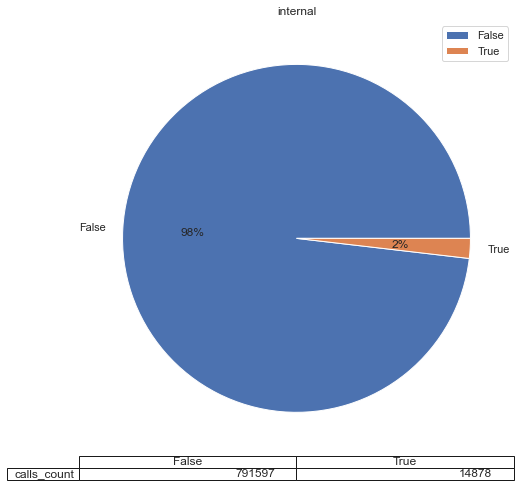

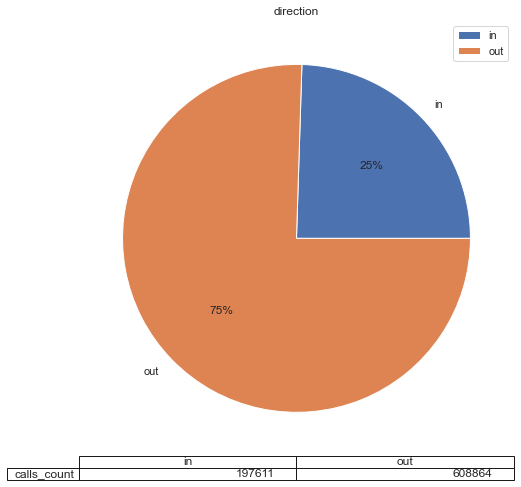

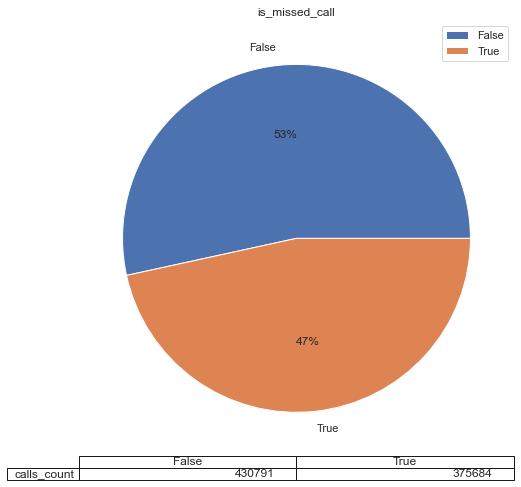

In [26]:
sns.set_theme(style="whitegrid")
for column in ['internal', 'direction', 'is_missed_call']:
    pie_chart(df, column)


–í–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ –≤—ã–∑–æ–≤—ã —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç 2% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞. 75% –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ –∏—Å—Ö–æ—è—â–∏–µ –≤—ã–∑–æ–≤—ã. 47% –≤—ã–∑–æ–≤–æ–≤ –æ—Å—Ç–∞—é—Ç—Å—è –Ω–µ–æ—Ç–≤–µ—á–µ–Ω–Ω—ã–º–∏. –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –ø–æ –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–º –∏ –≤–Ω–µ—à–Ω–∏–º –≤—ã–∑–æ–≤–∞–º –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –¥–∞–Ω–Ω—ã–µ –æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –≤—ã–∑–æ–≤–∞—Ö

In [27]:
df.query('is_missed_call == True').groupby(['operator_id', 'date']).sum().describe()

user_id      internal  is_missed_call   calls_count  \
count   12321.000000  12321.000000    12321.000000  12321.000000   
mean   191610.205665      0.195844        1.145199     22.102021   
std     61537.081710      0.398091        0.367869     80.539010   
min    166377.000000      0.000000        1.000000      1.000000   
25%    166839.000000      0.000000        1.000000      2.000000   
50%    167497.000000      0.000000        1.000000      6.000000   
75%    168187.000000      0.000000        1.000000     18.000000   
max    672364.000000      2.000000        4.000000   4817.000000   

       call_duration  total_call_duration  
count   12321.000000         12321.000000  
mean        1.928496           512.040419  
std        23.625580          1643.333198  
min         0.000000             0.000000  
25%         0.000000            34.000000  
50%         0.000000           120.000000  
75%         0.000000           405.000000  
max       741.000000         45312.000000

–ó–∞–º–µ–Ω–∏–º —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–µ `is_missed_call`, –≥–¥–µ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–∞–∑–≥–æ–≤–æ—Ä–∞ –±–æ–ª—å—à–µ 0 –Ω–∞ `False`

In [28]:
df.loc[(df['is_missed_call'] == True) & (df['call_duration'] > 0), 'is_missed_call'] = False

–ü–æ —á–∏—Å–ª–æ–≤—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤—ã–∑–æ–≤–æ–≤ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤—ã–∑–æ–≤–∞ —É—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –≤ —Å–µ–∫—É–Ω–¥–∞—Ö. –î–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —Ä–∞—Å—á–µ—Ç–æ–≤, –ø–µ—Ä–µ–≤–µ–¥–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ –º–∏–Ω—É—Ç—ã

In [29]:
df['total_call_duration'] = np.ceil(df['total_call_duration'] / 60)

df['call_duration'] = np.ceil(df['call_duration'] / 60)


In [30]:
(df
 .groupby(['internal','direction'])
 .agg(clients = ('user_id','nunique'),
      operators = ('operator_id','nunique'), 
      calls_count = ('calls_count','sum'),
      call_duration = ('call_duration','sum'), 
      total_call_duration = ('total_call_duration','sum'))
 
 # –¥–∞–ª–µ–µ –ø–æ —ç—Ç–∏–º –¥–∞–Ω–Ω—ã–º –º—ã –º–æ–∂–µ–º –ø–æ–¥—Å—á–∏—Ç–∞—Ç—å –æ–±—â—É—é –¥–æ–ª—é –ø–æ –∫–ª–∏–µ–Ω—Ç–∞–º:
 .assign(client_share = lambda x: x['clients'] / df['user_id'].nunique(),
        
 #–ø–æ–¥—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ –Ω–∞ –æ–¥–Ω–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞:        
         call_by_client = lambda x: x['calls_count'] / x['clients'])
)

clients  operators  calls_count  call_duration  \
internal direction                                                   
False    in             290        738       195773       169262.0   
         out            220        833       595824       540881.0   
True     in             106        179         1838         1217.0   
         out            148        503        13040        10289.0   

                    total_call_duration  client_share  call_by_client  
internal direction                                                     
False    in                    214469.0      1.000000      675.079310  
         out                   740310.0      0.758621     2708.290909  
True     in                      1863.0      0.365517       17.339623  
         out                    13091.0      0.510345       88.108108

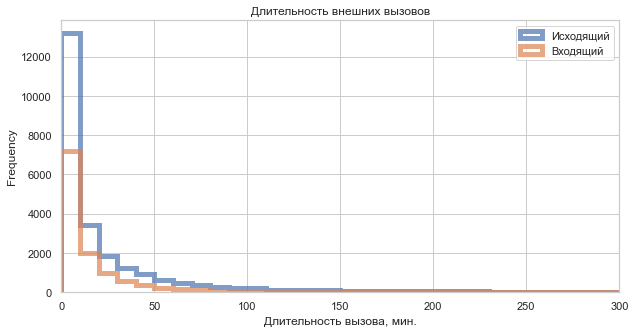

In [31]:
bin_size = 10
ax=df.query(
        'internal == False & direction == "out"'
    ).plot(
        kind='hist', 
        y='total_call_duration', 
        histtype='step',
        bins=np.arange(0, df.query(
        'internal == False & direction == "out"').total_call_duration.max(), bin_size),
        linewidth=5,
        alpha=0.7,
        label='–ò—Å—Ö–æ–¥—è—â–∏–π', 
        title='–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤–Ω–µ—à–Ω–∏—Ö –≤—ã–∑–æ–≤–æ–≤',
    figsize=(10,5)
    )
plt.xlim(0, 300)
    
ax2=df.query(
        'internal == False & direction == "in" & is_missed_call== False'
    ).plot(
        kind='hist', 
        y='total_call_duration', 
        histtype='step',
        bins=np.arange(0, df.query(
        'internal == False & direction == "in" & is_missed_call== False').total_call_duration.max(), bin_size),
        linewidth=5,
        alpha=0.7,
        label='–í—Ö–æ–¥—è—â–∏–π',  
        ax=ax
    )

plt.xlabel('–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤—ã–∑–æ–≤–∞, –º–∏–Ω.')

plt.show()


–ò–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –º–æ–∂–Ω–æ —Å–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –≤—Å–µ –∫–ª–∏–µ–Ω—Ç—ã –ø—Ä–∏–Ω–∏–º–∞—é—Ç –≤—Ö–æ–¥—è—â–∏–µ –≤–Ω–µ—à–Ω–∏–µ –≤—ã–∑–æ–≤—ã, –∞ –∏—Å—Ö–æ–¥—è—â–∏–µ —Å–æ–≤–µ—Ä—à–∞—é—Ç —Ç–æ–ª—å–∫–æ 75%, –∑–Ω–∞—á–∏—Ç –µ—Å—Ç—å –∫–ª–∏–µ–Ω—Ç—ã, –∫–æ—Ç–æ—Ä—ã–µ —Ä–∞–±–æ—Ç–∞—é—Ç —Ç–æ–ª—å–∫–æ –Ω–∞ –≤—Ö–æ–¥—è—â–∏–µ –≤—ã–∑–æ–≤—ã. –í —Å—Ä–µ–¥–Ω–µ–º –∫–ª–∏–µ–Ω—Ç —Å–æ–≤–µ—Ä—à–∞–µ—Ç 2000 –∏—Å—Ö–æ–¥—è—â–∏—Ö –≤–Ω–µ—à–Ω–∏—Ö –≤—ã–∑–æ–≤–æ–≤ –∏ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç 650 –≤—Ö–æ–¥—è—â–∏—Ö. –í–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ –≤—ã–∑–æ–≤—ã —Å–æ–≤–µ—Ä—à–∞—é—Ç —Ç–æ–ª—å–∫–æ 36%, –∞ –ø—Ä–∏–Ω–∏–º–∞—é—Ç 50% –∫–ª–∏–µ–Ω—Ç–æ–≤. –ß–∞—â–µ –≤—Å–µ–≥–æ –≤–Ω–µ—à–Ω–∏–π –≤—ã–∑–æ–≤ –¥–ª–∏—Ç—Å—è –Ω–µ –±–æ–ª–µ–µ 10 –º–∏–Ω—É—Ç

–ü—Ä–æ–≤–µ—Ä–∏–º –∞–Ω–æ–º–∞–ª–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –ø–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º –≤ —Ü–µ–ª–æ–º –∑–∞ –¥–µ–Ω—å

In [32]:
# –æ–±—â–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –ø–æ –¥–Ω—è–º

operator_by_day = df.groupby(['user_id', 'operator_id', 'date']).sum()
operator_by_day.describe()

internal  is_missed_call   calls_count  call_duration  \
count  19647.000000    19647.000000  19647.000000   19647.000000   
mean       0.274088        0.703110     35.738026      36.305390   
std        0.578600        0.613369    114.219206      98.416172   
min        0.000000        0.000000      1.000000       0.000000   
25%        0.000000        0.000000      2.000000       3.000000   
50%        0.000000        1.000000      9.000000      12.000000   
75%        0.000000        1.000000     32.000000      38.000000   
max        3.000000        3.000000   5022.000000    2418.000000   

       total_call_duration  
count         19647.000000  
mean             47.639691  
std             132.953323  
min               0.000000  
25%               4.000000  
50%              16.000000  
75%              50.000000  
max            3168.000000

75% –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ —Å–æ–≤–µ—Ä—à–∞—é—Ç –¥–æ 32 –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å –æ–±—â–µ–π –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é –¥–æ 50 –º–∏–Ω—É—Ç. –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –Ω–µ–ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞–∑–≥–æ–≤–æ—Ä–∞

In [33]:
operator_by_day.query('call_duration > 1000').groupby(['user_id', 'operator_id']).mean()

internal  is_missed_call  calls_count  call_duration  \
user_id operator_id                                                         
166582  885876.0     0.030303        1.242424  1291.393939    1628.060606   
        885890.0     0.000000        1.375000  1072.375000    1079.625000   
        925922.0     0.000000        1.000000  1086.000000    1051.500000   

                     total_call_duration  
user_id operator_id                       
166582  885876.0             2117.090909  
        885890.0             1516.437500  
        925922.0             1435.500000

–£–¥–∞–ª–∏–º –∏–∑ —Ç–∞–±–ª–∏—Ü—ã –≤—ã–∑–æ–≤—ã –¥–∞–Ω–Ω–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞

In [34]:
df = df.query('user_id != 166582')

In [35]:
df.query('calls_count > 1000').groupby('is_missed_call')['user_id'].nunique()

is_missed_call
True    5
Name: user_id, dtype: int64

–ê–Ω–æ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–ª–±—Ü–∞ `calls_count` –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º –≤—ã–∑–æ–≤–∞–º, –≤–µ—Ä–æ—è—Ç–Ω–æ, –æ—Å—É—â–µ—Å—Ç–≤–ª—è–µ–º—ã—Ö —Å –ø–æ–º–æ—â—å—é –∞–≤—Ç–æ–¥–æ–∑–≤–æ–Ω–∞.

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –≤—ã–∑–æ–≤—ã –ø–æ –≤—Ä–µ–º–µ–Ω–∏

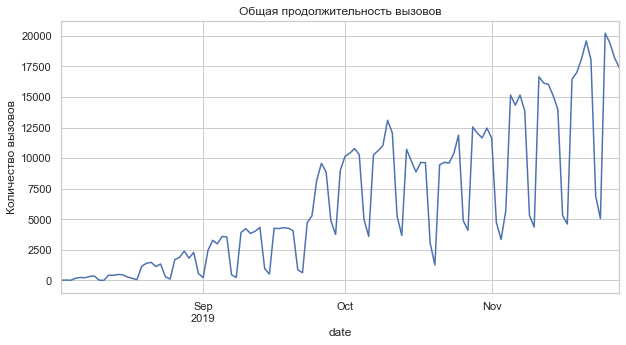

In [36]:
df.groupby('date')['total_call_duration'].sum().plot(
    kind='line', 
    grid=True, 
    title='–û–±—â–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤—ã–∑–æ–≤–æ–≤', 
    figsize=(10, 5))
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–∑–æ–≤–æ–≤')
plt.show()

–ì—Ä–∞—Ñ–∏–∫ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –≤–∫–ª—é—á–∞—é—Ç –≤—ã–∑–æ–≤—ã —Å –Ω–∞—á–∞–ª–∞ —Ä–∞–±–æ—Ç—ã —Ç–µ–ª–µ—Ñ–æ–Ω–∏–∏, –∞ —Ç–∞–∫–∂–µ –≤–∏–¥–Ω–∞ —Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç—å –≤ —Ä–∞–±–æ—Ç–µ —Ü–µ–Ω—Ç—Ä–∞. –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≤—ã–∑–æ–≤–æ–≤ –æ—Ç –¥–Ω—è –Ω–µ–¥–µ–ª–∏

In [37]:
# –¥–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü —Å –Ω–æ–º–µ—Ä–æ–º –¥–Ω—è –Ω–µ–¥–µ–ª–∏
df['day'] = df['date'].dt.weekday

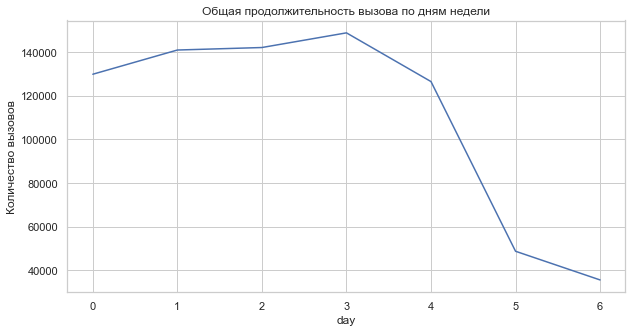

In [38]:
df.groupby('day')['total_call_duration'].sum().plot(
    kind='line', 
    grid=True, 
    title='–û–±—â–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤—ã–∑–æ–≤–∞ –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏',
    figsize=(10, 5))
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–∑–æ–≤–æ–≤')

plt.show()

–í—ã–∑–æ–≤—ã —Å–æ–≤–µ—Ä—à–∞—é—Ç—Å—è –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –ø–æ –±—É–¥–Ω—è–º. –ö –ø—è—Ç–Ω–∏—Ü–µ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–º–µ—Ç–Ω–æ —Å–Ω–∏–∂–∞–µ—Ç—Å—è, –∞ –≤ –≤—ã—Ö–æ–¥–Ω—ã–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –ª–∏—à—å –º–∞–ª–∞—è —á–∞—Å—Ç—å –∫–ª–∏–µ–Ω—Ç–æ–≤. –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤—ã–∑–æ–≤–æ–≤ –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ç–∞—Ä–∏—Ñ–æ–≤

In [39]:
# –æ–±—ä–µ–¥–∏–Ω—è–µ–º —Ç–∞–±–ª–∏—Ü—ã —Å –≤—ã–∑–æ–≤–∞–º–∏ –∏ –¥–∞–Ω–Ω—ã–º–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤
df = df.merge(clients, on='user_id', how='left')
df.head()

user_id       date direction  internal  operator_id  is_missed_call  \
0   166377 2019-08-04        in     False          NaN            True   
1   166377 2019-08-05       out      True     880022.0            True   
2   166377 2019-08-05       out      True     880020.0            True   
3   166377 2019-08-05       out      True     880020.0           False   
4   166377 2019-08-05       out     False     880022.0            True   

   calls_count  call_duration  total_call_duration  day tariff_plan date_start  
0            2            0.0                  1.0    6           B 2019-08-01  
1            3            0.0                  1.0    0           B 2019-08-01  
2            1            0.0                  1.0    0           B 2019-08-01  
3            1            1.0                  1.0    0           B 2019-08-01  
4            3            0.0                  1.0    0           B 2019-08-01

In [40]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
def calls_visualisation(data, time, column, func):
    plt.figure(figsize=(20, 12))
    ax1 = plt.subplot(2, 2, 1)
    data.pivot_table(index=time,
                     columns=column,
                     values='user_id',
                     aggfunc='nunique').plot(kind='line',
                                             grid=True,ax=ax1)
    plt.legend()
    plt.title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')

    ax2 = plt.subplot(2, 2, 2)
    data.pivot_table(index=time,
                     columns=column,
                     values='calls_count',
                     aggfunc=func).plot(kind='line', 
                                        grid=True, 
                                        ax=ax2)

    plt.legend()
    
    if func == 'sum':
        title = '–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–∑–æ–≤–æ–≤'
    elif func == 'mean':
        title = '–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–∑–æ–≤–æ–≤'
    else: title = '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–∑–æ–≤–æ–≤'
    plt.title(title)

    ax3 = plt.subplot(2, 2, 3)
    data.pivot_table(index=time,
                     columns=column, 
                     values='call_duration',
                     aggfunc=func).plot(kind='line',
                                        grid=True,
                                        ax=ax3)

    plt.legend()
    
    if func == 'sum':
        title = '–û–±—â–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–∞–∑–≥–æ–≤–æ—Ä–∞'
    elif func == 'mean':
        title = '–°—Ä–µ–¥–Ω—è—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–∞–∑–≥–æ–≤–æ—Ä–∞'
    else: title = '–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–∞–∑–≥–æ–≤–æ—Ä–∞'
 
    plt.title(title)
    
    ax4 = plt.subplot(2, 2, 4)
    data.pivot_table(index=time,
                     columns=column, 
                     values='total_call_duration',
                     aggfunc=func).plot(kind='line', 
                                        grid=True,
                                        ax=ax4)

    plt.legend()
    
    if func == 'sum':
        title = '–û–±—â–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤—ã–∑–æ–≤–∞'
    elif func == 'mean':
        title = '–°—Ä–µ–¥–Ω—è—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤—ã–∑–æ–≤–∞'
    else: title = '–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤—ã–∑–æ–≤–∞'
    plt.title(title)


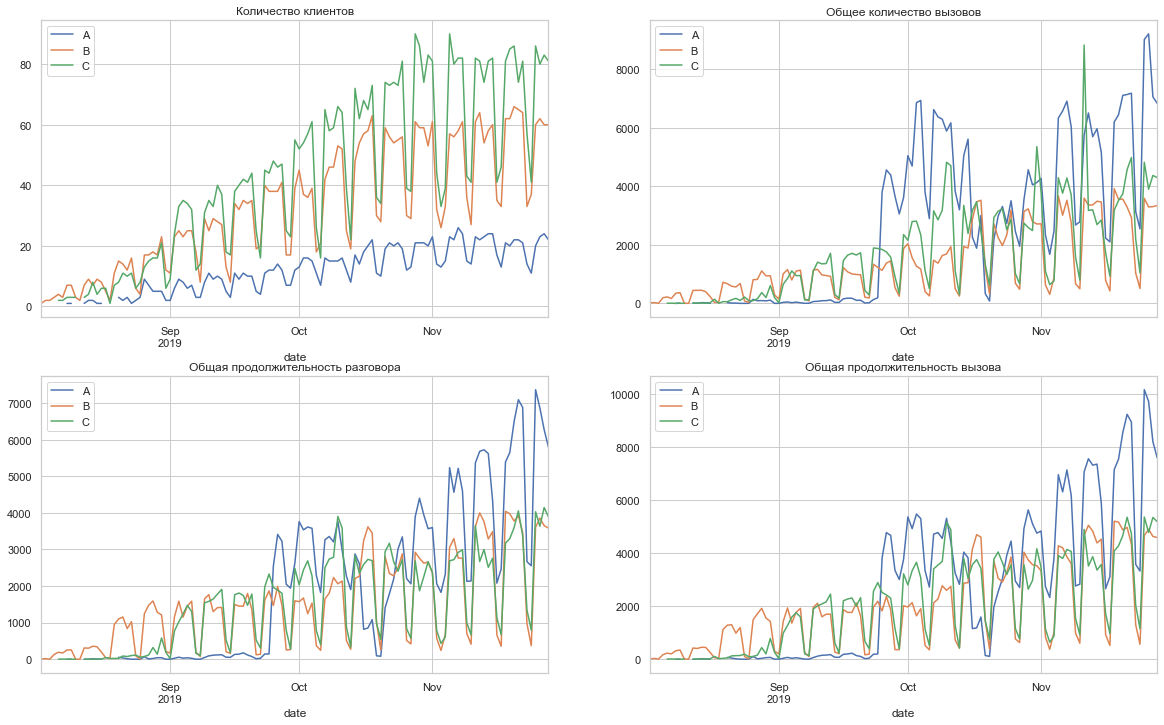

In [41]:
calls_visualisation(df, 'date', 'tariff_plan', 'sum')

–ü–æ –≥—Ä–∞—Ñ–∏–∫–∞–º –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –≤ –∞–≤–≥—É—Å—Ç–µ —Ä–∞–±–æ—Ç–∞–ª–∏ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –∫–ª–∏–µ–Ω—Ç—ã –Ω–∞ —Ç–∞—Ä–∏—Ñ–µ –í, –≤ —Å–µ–Ω—Ç—è–±—Ä–µ –ø–æ–¥–∫–ª—é—á–∏–ª–∏—Å—å –∫–ª–∏–µ–Ω—Ç—ã —Ç–∞—Ä–∏—Ñ–∞ –°, –∞ –¥–∞–Ω–Ω—ã–µ –ø–æ —Ç–∞—Ä–∏—Ñ—É –ê –µ—Å—Ç—å —Ç–æ–ª—å–∫–æ —Å –∫–æ–Ω—Ü–∞ —Å–µ–Ω—Ç—è–±—Ä—è. –û—Å–Ω–æ–≤–Ω–∞—è —á–∞—Å—Ç—å –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç —Ç–∞—Ä–∏—Ñ –° —Å –Ω–∞–∏–º–µ–Ω—å—à–µ–π –∞–±–æ–Ω–µ–Ω—Ç—Å–∫–æ–π –ø–ª–∞—Ç–æ–π, –≤—Ç–æ—Ä–æ–π –ø–æ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏ —Ç–∞—Ä–∏—Ñ –í. –° —Å–µ—Ä–µ–¥–∏–Ω—ã –æ–∫—Ç—è–±—Ä—è –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–≥–æ —Ä–æ—Å—Ç–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–∞ –≤—Å–µ—Ö —Ç–∞—Ä–∏—Ñ–∞—Ö, –∞ –Ω–∞ —Ç–∞—Ä–∏—Ñ–µ –ê –∑–∞–º–µ—Ç–Ω–æ —Ä–µ–∑–∫–æ–µ —Å–Ω–∏–∂–µ–Ω–∏–µ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤–æ –≤—Ç–æ—Ä–æ–π –ø–æ–ª–æ–≤–∏–Ω–µ –æ–∫—Ç—è–±—Ä—è. –î–ª—è —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ —Ç–∞—Ä–∏—Ñ–æ–≤ –æ—Å—Ç–∞–≤–∏–º –≤ —Ä–∞–±–æ—Ç–µ –ø–µ—Ä–∏–æ–¥, –∫–æ–≥–¥–∞ –Ω–∞ –∫–∞–∂–¥–æ–º —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–ª–∞—Å—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–∞—è –∫–ª–∏–µ–Ω—Ç—Å–∫–∞—è –±–∞–∑–∞

In [42]:
df = df.query('date >= "2019-10-01"')

### –ê–Ω–∞–ª–∏–∑ –∫–ª–∏–µ–Ω—Ç–æ–≤

–ò—Å–∫–ª—é—á–∏–º –∏–∑ –¥–∞–Ω–Ω—ã—Ö –Ω–µ–∞–∫—Ç–∏–≤–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤. –ë—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å –∞–∫—Ç–∏–≤–Ω—ã–º–∏ —Ç–µ—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫—Ç–æ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–Ω –º–µ–Ω—å—à–µ 30 –¥–Ω–µ–π —Å –ø–æ—Å–ª–µ–¥–Ω–µ–π –¥–∞—Ç—ã –∏–º–µ—é—â–∏—Ö—Å—è –≤—ã–∑–æ–≤–æ–≤, –∞ –Ω–µ–∞–∫—Ç–∏–≤–Ω—ã–º–∏ —Ç–µ—Ö, –∫—Ç–æ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–Ω –¥–∞–≤–Ω–æ, –Ω–æ –Ω–µ —Å–æ–≤–µ—Ä—à–∞–ª –∑–≤–æ–Ω–∫–æ–≤ –≤ —Ç–µ—á–µ–Ω–∏–µ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö 30 –¥–Ω–µ–π

In [43]:
ACTIVE_DAYS = 30

In [44]:
# —Ç–∞–±–ª–∏—Ü–∞ —Å –¥–∞—Ç–æ–π —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∏ –¥–∞—Ç–æ–π –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –≤—ã–∑–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞
activity = df.groupby('user_id').agg({'date_start': 'max', 'date': 'max'}).reset_index()

In [45]:
# –¥–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±—Ü—ã —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –¥–Ω–µ–π —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∏ –¥–Ω–µ–π —Å –¥–∞—Ç—ã –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –≤—ã–∑–æ–≤–∞
activity['registered'] = (LAST_DATE - activity['date_start']).dt.days
activity['last_call'] = (LAST_DATE - activity['date']).dt.days

In [46]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∫–ª–∏–µ–Ω—Ç–∞
def active_users(row_values):
    if row_values['registered'] < ACTIVE_DAYS:
        return True
    elif row_values['last_call'] < ACTIVE_DAYS:
        return True
    return False

In [47]:
# –¥–æ–±–∞–≤–∏–º –∫–æ–ª–æ–Ω–∫—É —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ–± –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏
activity['active_user'] = activity.apply(active_users, axis=1)

# –≤—ã–¥–µ–ª—è–µ–º —Å–ø–∏—Å–æ–∫ –Ω–µ–∞–∫—Ç–∏–≤–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤
not_active_users = activity[activity['active_user'] == False]['user_id']

# –∏—Å–∫–ª—é—á–∞–µ–º –∏–∑ —Ç–∞–±–ª–∏—Ü—ã —Å –≤—ã–∑–æ–≤–∞–º–∏ —Å—Ç—Ä–æ–∫–∏ —Å –Ω–µ–∞–∫—Ç–∏–≤–Ω—ã–º–∏ –∫–ª–∏–µ–Ω—Ç–∞–º–∏
df = df.query('user_id not in @not_active_users')

print('–ê–∫—Ç–∏–≤–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤:',df['user_id'].nunique())

–ê–∫—Ç–∏–≤–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤: 256


In [48]:
operators = df.groupby(['user_id', 'tariff_plan'])['operator_id'].nunique().reset_index()

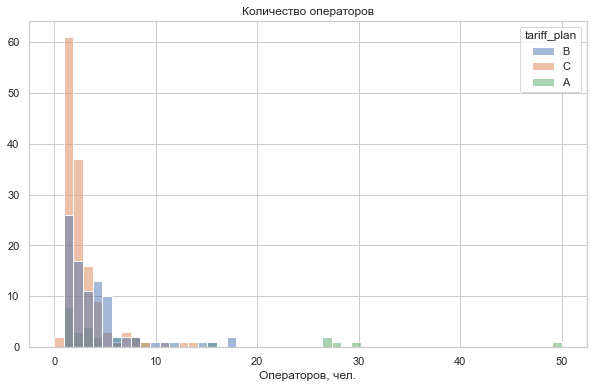

In [49]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))  
sns.histplot(data=operators, x="operator_id", hue='tariff_plan')
plt.title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤')
plt.xlabel('–û–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤, —á–µ–ª.')
plt.ylabel(None)
plt.show()

–ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ —É –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–∞ —Ç–∞—Ä–∏—Ñ–µ –í –∏ –°. –î–ª—è –∞–±–æ–Ω–µ–Ω—Ç–æ–≤ —Ç–∞—Ä–∏—Ñ–∞ –° —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω–∞ —Ä–∞–±–æ—Ç–∞ 1-2 –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤, –∞ —É –∞–±–æ–Ω–µ–Ω—Ç–æ–≤ —Ç–∞—Ä–∏—Ñ–∞ –í —Ä–∞–±–æ—Ç–∞—é—Ç –æ 5 –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤.

### –ê–Ω–∞–ª–∏–∑ –≤—ã–∑–æ–≤–æ–≤

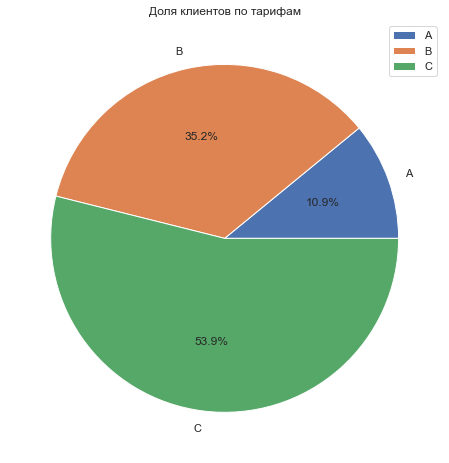

In [50]:
df.groupby('tariff_plan').agg({'user_id': 'nunique'}).plot(
    kind='pie', 
    y='user_id', 
    autopct='%1.1f%%',
    title='–î–æ–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ —Ç–∞—Ä–∏—Ñ–∞–º', 
    figsize=(8, 8))
plt.ylabel(None)
plt.show()


In [51]:
df.groupby('tariff_plan').agg({'user_id': 'nunique'})

user_id
tariff_plan         
A                 28
B                 90
C                138

–ß—É—Ç—å –±–æ–ª—å—à–µ –ø–æ–ª–æ–≤–∏–Ω—ã –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏—Å–ø–æ–ª—å–∑—É—é—Ç —Ç–∞—Ä–∏—Ñ –°, –≤—Ç–æ—Ä–æ–π –ø–æ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏ —Ç–∞—Ä–∏—Ñ –í, –∞ –∫–ª–∏–µ–Ω—Ç—ã —Ç–∞—Ä–∏—Ñ–∞ –ê —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç –ª–∏—à—å 10,9%.

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≤—ã–∑–æ–≤–æ–≤

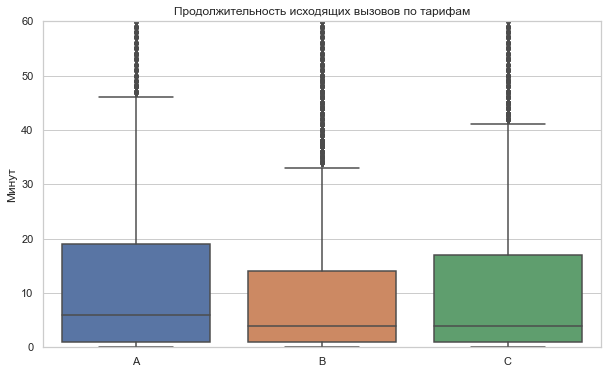

In [52]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x ='tariff_plan',y = 'total_call_duration', data = df.query('direction == "out"').sort_values(by='tariff_plan'))
plt.ylim(0, 60)
plt.title('–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏—Å—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–æ–≤ –ø–æ —Ç–∞—Ä–∏—Ñ–∞–º')
plt.ylabel('–ú–∏–Ω—É—Ç')
plt.xlabel(None)
plt.show()

–ú–µ–¥–∏–∞–Ω–∞ –±–ª–∏–∑–∫–∞ –¥–ª—è –≤—Å–µ—Ö —Ç–∞—Ä–∏—Ñ–æ–≤ –Ω–∞ –æ—Ç–º–µ—Ç–∫–µ –æ–∫–æ–ª–æ 5 –º–∏–Ω—É—Ç. –î–ª—è —Ç–∞—Ä–∏—Ñ–∞ –ê 75% –≤—ã–∑–æ–≤–æ–≤ –∑–∞–∫–∞–Ω—á–∏–≤–∞—é—Ç—Å—è –¥–æ 20 –º–∏–Ω—É—Ç, —á—É—Ç—å –º–µ–Ω—å—à–µ –Ω–∞ —Ç–∞—Ä–∏—Ñ–µ –°, –∞ –¥–ª—è —Ç–∞—Ä–∏—Ñ–∞ –í –æ–∫–æ–ª–æ 15 –º–∏–Ω—É—Ç.

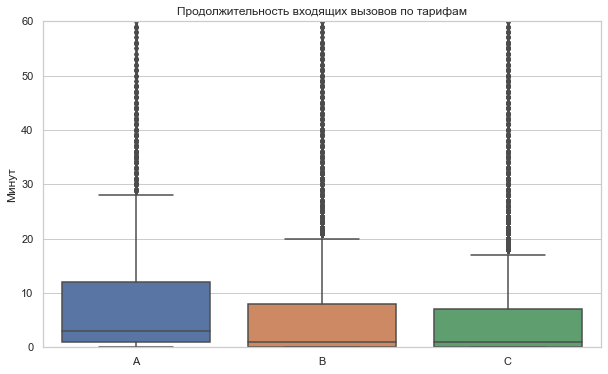

In [53]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x ='tariff_plan',y = 'call_duration', data = df.query('direction == "in"').sort_values(by='tariff_plan'))
plt.title('–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–æ–≤ –ø–æ —Ç–∞—Ä–∏—Ñ–∞–º')
plt.ylim(0, 60)
plt.ylabel('–ú–∏–Ω—É—Ç')
plt.xlabel(None)
plt.show()

–í—Ö–æ–¥—è—â–∏–µ –≤—ã–∑–æ–≤—ã –∑–∞–º–µ—Ç–Ω–æ –∫–æ—Ä–æ—á–µ –Ω–∞ –≤—Å–µ—Ö —Ç–∞—Ä–∏—Ñ–∞—Ö. –î–ª—è —Ç–∞—Ä–∏—Ñ–∞ –ê –∏ –í —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã –∑–≤–æ–Ω–∫–∏ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é –¥–æ 5 –º–∏–Ω—É—Ç, –∞ –Ω–∞ —Ç–∞—Ä–∏—Ñ–µ –∞ –¥–æ 10 –º–∏–Ω—É—Ç. –ö–∞–∫ –¥–ª—è –≤—Ö–æ–¥—è—â–∏—Ö, —Ç–∞–∫ –∏ –¥–ª—è –∏—Å—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–æ–≤ –µ—Å—Ç—å –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤ —Å –Ω–µ—Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω–æ–π –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é. –ü—Ä–æ–≤–µ—Ä–∏–º, –µ—Å—Ç—å –ª–∏ –∞–±–æ–Ω–µ–Ω—Ç—ã, –∫–æ—Ç–æ—Ä—ã–µ —Ä–∞–±–æ—Ç–∞—é—Ç —Ç–æ–ª—å–∫–æ —Å –≤—Ö–æ–¥—è—â–∏–º–∏ –ª–∏–±–æ —Ç–æ–ª—å–∫–æ —Å –∏—Å—Ö–æ–¥—è—â–∏–º–∏ –∑–≤–æ–Ω–∫–∞–º–∏

<div class="alert alert-warning">
<b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ç–∏–º–ª–∏–¥–∞ v.1</b> 
    
üìù –° –æ–¥–Ω–æ–π —Å—Ç–æ—Ä–æ–Ω—ã, –≤—Å–µ –≤–µ—Ä–Ω–æ, —á—Ç–æ —Ç—ã —Å–º–æ—Ç—Ä–∏—à—å –Ω–∞ –¥–∏–Ω–∞–º–∏–∫—É –∑–Ω–∞—á–µ–Ω–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤ —Ä–∞—Å—á–µ—Ç–∞—Ö. –ù–æ —Ç—É—Ç —Ç–æ–∂–µ –µ—Å—Ç—å –º–æ–º–µ–Ω—Ç –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –õ—É—á—à–µ, –∫–æ–≥–¥–∞ –º—ã —Å—Ä–∞–≤–Ω–∏–≤–∞–µ–º –∏–ª–∏ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏–ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å –Ω–∞ —á—Ç–æ-—Ç–æ. –ï—Å–ª–∏ –±—ã —É –Ω–∞—Å –∫–∞–∂–¥–∞—è —Å—Ç—Ä–æ–∫–∞ —Å–æ–¥–µ—Ä–∂–∞–ª–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é —Ç–æ–ª—å–∫–æ –æ –æ–¥–Ω–æ–º –∑–≤–æ–Ω–∫–µ - —Ç–æ–≥–¥–∞ –≤–æ–ø—Ä–æ—Å–æ–≤ –Ω–µ –±—ã–ª–æ –±—ã.
    </div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞ v.2</b>
–ú–µ–Ω—è–µ–º</div>

<div class="alert alert-success">
<b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ç–∏–º–ª–∏–¥–∞ v.2</b> 
    
üëç
</div>

In [54]:
user_by_day = df.groupby(['user_id', 'tariff_plan', 'date', 'direction']).sum().reset_index()

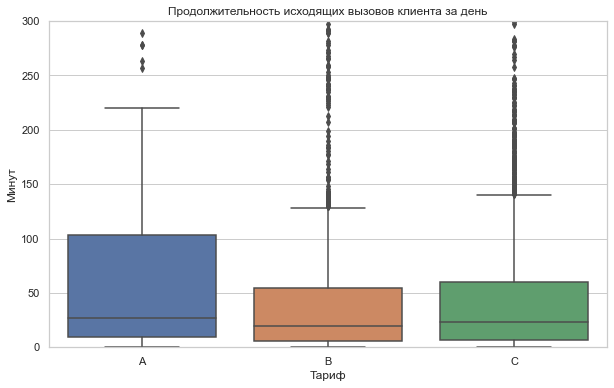

In [55]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x ='tariff_plan',y = 'total_call_duration', data = user_by_day.query('direction == "out"').sort_values(by='tariff_plan'))
plt.ylim(0, 300)
plt.title('–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏—Å—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–æ–≤ –∫–ª–∏–µ–Ω—Ç–∞ –∑–∞ –¥–µ–Ω—å')
plt.ylabel('–ú–∏–Ω—É—Ç')
plt.xlabel('–¢–∞—Ä–∏—Ñ')
plt.show()

–ö–ª–∏–µ–Ω—Ç—ã —Ç–∞—Ä–∏—Ñ–∞ –ê —á–∞—â–µ –≤—Å–µ–≥–æ —Ç—Ä–∞—Ç—è—Ç –¥–æ 100 –º–∏–Ω—É—Ç –Ω–∞ –∏—Å—Ö–æ–¥—è—â–∏–µ –≤—ã–∑–æ–≤—ã –≤ –¥–µ–Ω—å, —Ç–∞—Ä–∏—Ñ–∞ –° –∏ –í - –æ–∫–æ–ª–æ 50 –º–∏–Ω—É—Ç.

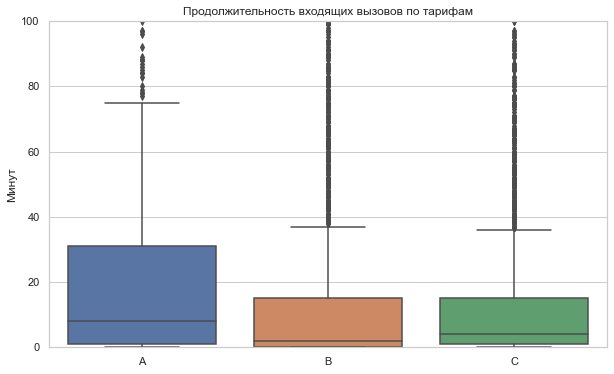

In [56]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x ='tariff_plan',y = 'call_duration', data = user_by_day.query('direction == "in"').sort_values(by='tariff_plan'))
plt.title('–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–æ–≤ –ø–æ —Ç–∞—Ä–∏—Ñ–∞–º')
plt.ylim(0, 100)
plt.ylabel('–ú–∏–Ω—É—Ç')
plt.xlabel(None)
plt.show()

–ù–∞ –≤—Ö–æ–¥—è—â–∏–µ –≤—ã–∑–æ–≤—ã –∫–ª–∏–µ–Ω—Ç—ã —Ç–∞—Ä–∏—Ñ–∞ –ê —Ç—Ä—è—Ç—è—Ç –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –¥–æ 30 –º–∏–Ω—É—Ç, –∞ –∫–ª–∏–µ–Ω—Ç–∞–º —Ç–∞—Ä–∏—Ñ–æ–≤ –í –∏ –° –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ 20 –º–∏–Ω—É—Ç

In [57]:
# —Å—Ç–æ–ª–±–µ—Ü —Å –Ω–æ–º–µ—Ä–æ–º –º–µ—Å—è—Ü–∞
df['month'] = df['date'].dt.month

In [58]:
# —Å–ø–∏—Å–æ–∫ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ–º –≤–Ω–µ—à–Ω–∏—Ö –≤—ã–∑–æ–≤–æ–≤
users_one_direction = df.query('internal == False').groupby('user_id').nunique().query('direction == 1').index
df.query('user_id in @users_one_direction').groupby('direction')['user_id'].nunique()

direction
in     66
out     1
Name: user_id, dtype: int64

In [59]:
df.query('user_id in @users_one_direction').groupby(
    ['tariff_plan', 'month']
).agg(
    {'user_id':'nunique', 'is_missed_call': 'sum', 'operator_id': 'nunique', 'total_call_duration': 'sum'}
)

user_id  is_missed_call  operator_id  total_call_duration
tariff_plan month                                                           
A           10           4              74            9                747.0
            11           5              63            8                647.0
B           10          13              93           20                556.0
            11          15             155           21               2697.0
C           10          43             253           51               2301.0
            11          44             235           60               2985.0

–í—Å–µ–≥–æ 63 –∫–ª–∏–µ–Ω—Ç–∞ —Ç–æ–ª—å–∫–æ –ø—Ä–∏–Ω–∏–º–∞—é—Ç –≤—Ö–æ–¥—è—â–µ –≤—ã–∑–æ–≤—ã, –æ—Å–Ω–æ–≤–Ω–∞—è —á–∞—Å—Ç—å –∫–æ—Ç–æ—Ä—ã—Ö –∏—Å–ø–æ–ª—å–∑—É–µ—Ç —Ç–∞—Ä–∏—Ñ –° —Å –Ω–∞–∏–º–µ–Ω—å—à–µ–π –∞–±–æ–Ω–µ–Ω—Ç—Å–∫–æ–π –ø–ª–∞—Ç–æ–π

### –í—ã–≤–æ–¥

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–∏ –∏—Å–∫–ª—é—á–µ–Ω—ã –Ω–µ–∞–∫—Ç–∏–≤–Ω—ã–µ –∫–ª–∏–µ–Ω—Ç—ã, –∫–æ—Ç–æ—Ä—ã–µ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–Ω—ã –¥–∞–≤–Ω–æ, –Ω–æ –≤ –ø–æ—Å–ª–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –Ω–µ —Å–æ–≤–µ—Ä—à–∞–ª–∏ –≤—ã–∑–æ–≤—ã. –í—Å–µ–≥–æ –∞–∫—Ç–∏–≤–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ 256. –°—Ä–µ–¥–∏ –Ω–∏—Ö —á–∞—â–µ –≤—Å–µ–≥–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –∫–ª–∏–µ–Ω—Ç—ã —Ç–∞—Ä–∏—Ñ–∞ –° –∏ —Ä–µ–∂–µ —Ç–∞—Ä–∏—Ñ–∞ –ê. –†–µ–¥–∫–æ —á–∏—Å–ª–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –ø—Ä–µ–≤—ã—à–∞–µ—Ç 5 —á–µ–ª–æ–≤–µ–∫, —á–∞—â–µ –≤—Å–µ–≥–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –∫–ª–∏–µ–Ω—Ç—ã —Å –æ–¥–Ω–∏–º –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–º. –î–ª—è —Ç–∞—Ä–∏—Ñ–∞ –ê —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω—ã–µ –≤—ã–∑–æ–≤—ã. 63 –∫–ª–∏–µ–Ω—Ç–∞ —Ä–∞–±–æ—Ç–∞—é—Ç —Ç–æ–ª—å–∫–æ –Ω–∞ –≤—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–∞—Ö

## –í—ã—Ä—É—á–∫–∞

### –§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è –≤—ã—Ä—É—á–∫–∞

In [60]:
# —Ç–∞–±–ª–∏—Ü–∞ —Å –æ–±—â–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∏—Å—Ö–æ–¥—è—â–∏—Ö –≤–Ω–µ—à–Ω–∏—Ö –≤—ã–∑–æ–≤–æ–≤

total_out_calls = df.query(
    'direction == "out"'
).groupby(['user_id', 'tariff_plan', 'month', 'internal']
).agg(
    {
        'total_call_duration': 'sum'
    }
).reset_index()
total_out_calls.head()


user_id tariff_plan  month  internal  total_call_duration
0   166377           B     10     False               1704.0
1   166377           B     10      True                  2.0
2   166377           B     11     False               1633.0
3   166377           B     11      True                  4.0
4   166405           B     10     False               6390.0

In [61]:
# —Ç–∞–±–ª–∏—Ü–∞ —Å –æ–±—â–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –≤—Ö–æ–¥—è—â–∏—Ö –≤–Ω–µ—à–Ω–∏—Ö –≤—ã–∑–æ–≤–æ–≤

total_In_calls = df.query(
    'direction == "in"'
).groupby(['user_id', 'tariff_plan', 'month', 'internal']
).agg(
    {
        'total_call_duration': 'sum'
    }
).reset_index()
total_In_calls.head()

user_id tariff_plan  month  internal  total_call_duration
0   166377           B     10     False                 60.0
1   166377           B     11     False                 66.0
2   166391           C     10     False                  2.0
3   166391           C     11     False                  4.0
4   166392           C     10     False                145.0

–¢–∞–∫ –∫–∞–∫ –≤—Ö–æ–¥—è—â–∏–µ –≤—ã–∑–æ–≤—ã –Ω–µ —Ç–∞—Ä–∏—Ñ–∏—Ü–∏—Ä—É—é—Ç—Å—è, –æ–±–Ω—É–ª–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ `total_call_duration`

In [62]:
total_In_calls['total_call_duration'] = 0

# –ø–æ–ª—É—á–∞–µ–º —Ç–∞–±–ª–∏—Ü—É —Å –æ–±—â–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∑–≤–æ–Ω–∫–æ–≤
total_calls = total_In_calls.append(total_out_calls)

In [63]:
# –¥–æ–±–∞–≤–ª—è–µ–º —É—Å–ª–æ–≤–∏—è —Ç–∞—Ä–∏—Ñ–∞
income = total_calls.merge(tariffs, on='tariff_plan', how='left')
income.head()

user_id tariff_plan  month  internal  total_call_duration  rub_monthly_fee  \
0   166377           B     10     False                  0.0             2000   
1   166377           B     11     False                  0.0             2000   
2   166391           C     10     False                  0.0             1000   
3   166391           C     11     False                  0.0             1000   
4   166392           C     10     False                  0.0             1000   

   minutes_included  rub_per_min_in  rub_per_min_out  rub_per_operator  
0              2000            0.15              0.5               100  
1              2000            0.15              0.5               100  
2              2000            0.30              0.7               100  
3              2000            0.30              0.7               100  
4              2000            0.30              0.7               100

–ü—Ä–æ–≤–µ—Ä–∏–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–∏–Ω—É—Ç –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏—Ö –≤—ã–∑–æ–≤–æ–≤ –≤ –º–µ—Å—è—Ü

In [64]:
income.query('internal == True').groupby('month')['total_call_duration'].max()

month
10     486.0
11    1540.0
Name: total_call_duration, dtype: float64

–ù–∏ –æ–¥–∏–Ω –∫–ª–∏–µ–Ω—Ç –Ω–µ –∏–∑—Ä–∞—Å—Ö–æ–¥–æ–≤–∞–ª –ø–∞–∫–µ—Ç –º–∏–Ω—É—Ç –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏—Ö –≤—ã–∑–æ–≤–æ–≤, –∞ –∑–Ω–∞—á–∏—Ç –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ –≤—ã–∑–æ–≤—ã –∫–ª–∏–µ–Ω—Ç—ã –Ω–µ –æ–ø–ª–∞—á–∏–≤–∞–ª–∏

In [65]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ –≤—ã—Ä—É—á–∫–∏ –ø–æ –∫–∞–∂–¥–æ–º—É —Ç–∏–ø—É –≤—ã–∑–æ–≤–∞

def tariff_calls(row):
    if row['internal'] == False:
        month_income = row['total_call_duration'] * row['rub_per_min_out']
        return round(month_income)
    if row['total_call_duration'] >= row['minutes_included']:
        month_income = (row['total_call_duration'] - (row['minutes_included'] - 1)) * row['rub_per_min_in']
        return round(month_income)
    month_income = 0
    return round(month_income)

In [66]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ –æ–±—â–µ–π –≤—ã—Ä—É—á–∫–∏ –∑–∞ –º–µ—Å—è—Ü

def income_by_month(income_df, raw_df):
    income_df['calls'] = income_df.apply(tariff_calls, axis=1) 
    operator_count = raw_df.groupby(['user_id', 'month'])['operator_id'].nunique().reset_index()
    income_by_month = income_df.groupby(
        [
            'user_id', 'month', 'tariff_plan'
        ]
    ).agg(
        {
            'rub_monthly_fee': 'first', 'rub_per_operator': 'first', 'calls': 'sum'
        }
    ).reset_index()
    income_by_month = income_by_month.merge(operator_count, on=['user_id', 'month'], how='right')
    income_by_month['operator_id'] = income_by_month['operator_id'] * income_by_month['rub_per_operator']
    income_by_month['total'] = income_by_month['operator_id'] + income_by_month['rub_monthly_fee'] + income_by_month['calls']
    income_by_month = income_by_month.rename(columns={'operator_id': 'operator'})
    return income_by_month

In [67]:
income_fact = income_by_month(income, df)
income_fact.head()

user_id  month tariff_plan  rub_monthly_fee  rub_per_operator  calls  \
0   166377     10           B             2000               100    852   
1   166377     11           B             2000               100    816   
2   166391     10           C             1000               100      0   
3   166391     11           C             1000               100      0   
4   166392     10           C             1000               100      0   

   operator  total  
0       500   3352  
1       400   3216  
2         0   1000  
3       100   1100  
4       200   1200

### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–æ–π –≤—ã—Ä—É—á–∫–∏

In [68]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –≤—ã—Ä—É—á–∫–∏

def income_vis(income_df):
    income_df.pivot_table(index='month',
                     columns='tariff_plan',
                     values='total',
                     aggfunc='mean',
                  ).plot(kind='line',
                         figsize=(10,5),
                         grid=True)
    plt.show()
    report = income_df.groupby('tariff_plan').sum()
    total_income = report['total'].sum()
    print('–í—ã—Ä—É—á–∫–∞ –≤—Å–µ–≥–æ:', total_income)
    
    report.plot(kind='pie', y='total', autopct='%1.1f%%',title='–î–æ–ª—è –≤—ã—Ä—É—á–∫–∏ –ø–æ —Ç–∞—Ä–∏—Ñ–∞–º', figsize=(8, 8))
    plt.ylabel(None)
    plt.show()
    
    g = sns.catplot(
        data=income_df.sort_values(by='tariff_plan'), kind="bar",
        x="month", y='total', hue='tariff_plan',
        ci="sd", palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)
    g.set_axis_labels("", "–í—ã—Ä—É—á–∫–∞, —Ä—É–±.")
    g.legend.set_title("")
    
    report = report[['rub_monthly_fee', 'calls', 'operator']].T
    for column in report.columns:
        report.plot(kind='pie', y=column, autopct='%1.1f%%',title=column, figsize=(8, 8))
        plt.show()

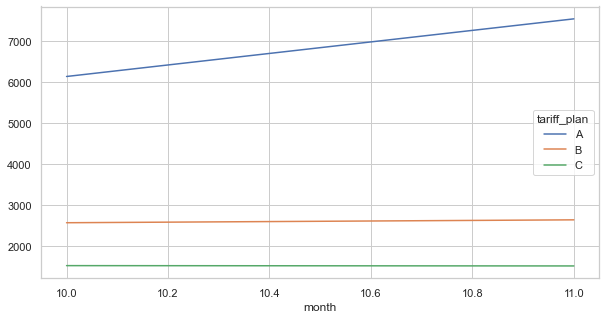

–í—ã—Ä—É—á–∫–∞ –≤—Å–µ–≥–æ: 1216802


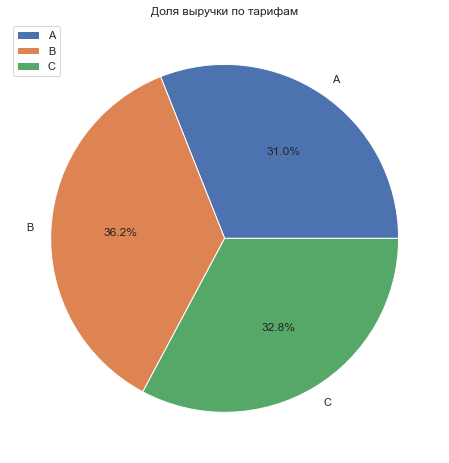

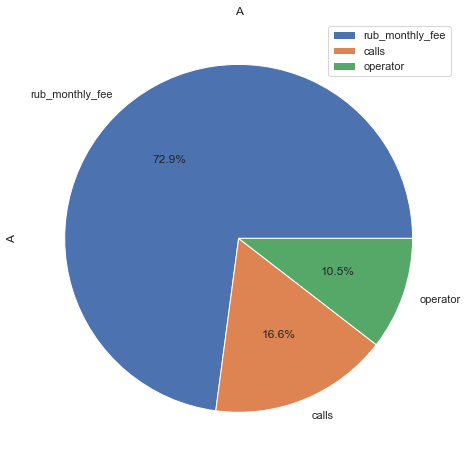

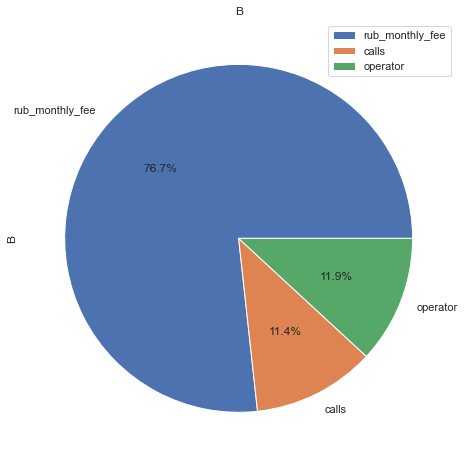

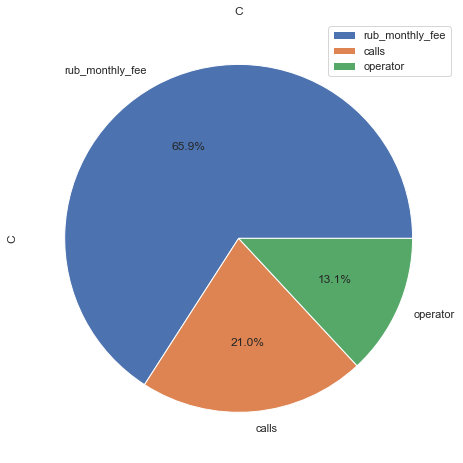

In [69]:
income_vis(income_fact)

–ü–æ –≥—Ä–∞—Ñ–∏–∫–∞–º –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ —á—Ç–æ –≤—ã—Ä—É—á–∫–∞ —Ç–∞—Ä–∏—Ñ–∞ –ê —É–≤–µ–ª–∏—á–∏–≤–∞–ª–∞—Å—å –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ –≤—Å–µ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, –≤—ã—Ä—É—á–∫–∞ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö —Ç–∞—Ä–∏—Ñ–æ–≤ –∑–∞–º–µ—Ç–Ω–æ –Ω–µ –∏–∑–º–µ–Ω—è–ª–∞—Å—å. –ù–µ —Å–º–æ—Ç—Ä—è –Ω–∞ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω—É—é —Ä–∞–∑–Ω–∏—Ü—É –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –∫–ª–∏–µ–Ω—Ç–æ–≤, –≤—Å–µ —Ç—Ä–∏ —Ç–∞—Ä–∏—Ñ–∞ –ø—Ä–∏–Ω–µ—Å–ª–∏ –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π –¥–æ—Ö–æ–¥. –û—Å–Ω–æ–≤–Ω—É—é —á–∞—Å—Ç—å –≤—ã—Ä—É—á–∫–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –∞–±–æ–Ω–µ–Ω—Ç—Å–∫–∞—è –ø–ª–∞—Ç–∞

### –ü–æ–∏—Å–∫ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –Ω–µ–æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º–∏ —Ç–∞—Ä–∏—Ñ–∞–º–∏

–î–ª—è –ø–æ–∏—Å–∫–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –Ω–µ–≤—ã–≥–æ–¥–Ω—ã–º —Ç–∞—Ä–∏—Ñ–æ–º, —Å—Ä–∞–≤–Ω–∏–º —Ç–∞—Ä–∏—Ñ –≤—ã—á–∏—Å–ª–∏–º –ø—Ä–∏ –∫–∞–∫–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –º–∏–Ω—É—Ç –∏—Å—Ö–æ–¥—è—â–∏—Ö –≤–Ω–µ—à–Ω–∏—Ö –≤—ã–∑–æ–≤–æ–≤ –∞–±–æ–Ω–µ–Ω—Ç—Å–∫–∞ –ø–ª–∞—Ç–∞ –±—É–¥–µ—Ç –æ–¥–∏–Ω–∞–∫–æ–≤–∞ –∏ –ø—Ä–µ–¥–ª–æ–∂–∏–º –∫–ª–∏–µ–Ω—Ç–∞–º –±–æ–ª–µ–µ –≤—ã–≥–æ–¥–Ω—ã–π —Ç–∞—Ä–∏—Ñ, –µ—Å–ª–∏ –æ–Ω —Ä–∞—Å—Ö–æ–¥—É–µ—Ç –º–µ–Ω—å—à–µ —ç—Ç–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞

In [70]:
A_B = int((5000 - 2000) / (0.5 - 0.4))
A_B

30000

In [71]:
B_C = int((2000 - 1000) / (0.7 - 0.5))
B_C

5000

–¶–µ–ª–µ—Å–æ–±—Ä–∞–∑–Ω–æ –ø–µ—Ä–µ–π—Ç–∏ –Ω–∞ —Ç–∞—Ä–∏—Ñ –í —Ç–µ–º –∫–ª–∏–µ–Ω—Ç–∞–º —Ç–∞—Ä–∏—Ñ–∞ –ê, –∫–æ—Ç–æ—Ä—ã–µ —Ä–∞—Å—Ö–æ–¥—É—é—Ç –º–µ–Ω–µ–µ 30000. –¢–µ–º –∞–±–æ–Ω–µ–Ω—Ç–∞–º —Ç–∞—Ä–∏—Ñ–∞ –í, –∫–æ—Ç–æ—Ä—ã–µ —Ä–∞—Å—Ö–æ–¥—É—é—Ç –¥–æ 5000 –º–∏–Ω—É—Ç —Ü–µ–ª–µ—Å–æ–±—Ä–∞–∑–Ω–æ —Å–º–µ–Ω–∏—Ç—å —Ç–∞—Ä–∏—Ñ –Ω–∞ –°.

In [72]:
# –∏—Å—Ö–æ–¥—è—â–∏–µ –≤–Ω–µ—à–Ω–∏–µ –≤—ã–∑–æ–≤—ã 

total_out_calls_ext = total_out_calls.query('internal == False')
total_out_calls_ext.head()

user_id tariff_plan  month  internal  total_call_duration
0   166377           B     10     False               1704.0
2   166377           B     11     False               1633.0
4   166405           B     10     False               6390.0
6   166405           B     11     False               6888.0
8   166406           B     10     False               1886.0

In [73]:
# —Ñ—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –ø–æ–¥—Ö–æ–¥—è—â–∏–π —Ç–∞—Ä–∏—Ñ –∏–ª–∏ –∑–∞–ø–∏—Å—å "–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Ç–∞—Ä–∏—Ñ", –µ—Å–ª–∏ –∫–ª–∏–µ–Ω—Ç –Ω–µ –ø–µ—Ä–µ–ø–ª–∞—á–∏–≤–∞–µ—Ç

def offer(row):
    if row['tariff_plan'] == "A":
        if row['total_call_duration'] > 30000:
            return '–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Ç–∞—Ä–∏—Ñ'
        #if row['total_call_duration'] <= 30000 #and row['total_call_duration'] > 5000:
        return 'B'
        #return 'C'
    if row['tariff_plan'] == "B":
        if row['total_call_duration'] > 30000:
            return 'A'
        if row['total_call_duration'] <= 30000 and row['total_call_duration'] > 5000:
            return '–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Ç–∞—Ä–∏—Ñ'
        return 'C'
    if row['tariff_plan'] == "C":
        if row['total_call_duration'] > 30000:
            return 'A'
        if row['total_call_duration'] <= 30000 and row['total_call_duration'] > 5000:
            return 'B'
        return '–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Ç–∞—Ä–∏—Ñ'

In [74]:
# –¥–æ–±–∞–≤–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü —Å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º —Ç–∞—Ä–∏—Ñ–æ–º
total_out_calls_ext['offer'] = total_out_calls_ext.apply(offer, axis=1)
# —Å–ø–∏—Å–æ–∫ "–∫–ª–∏–µ–Ω—Ç - –Ω–æ–≤—ã–π —Ç–∞—Ä–∏—Ñ".
change_tariff = total_out_calls_ext.groupby('user_id').agg(
fact_tariff = ('tariff_plan', 'last'),
offer = ('offer', 'last')
).query('offer != "–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Ç–∞—Ä–∏—Ñ"').reset_index()

In [75]:
temp = income_fact.query('calls == 0 & tariff_plan == "A"').groupby(['user_id', 'tariff_plan']).sum().reset_index()
temp['offer'] = 'B'
temp = temp[['user_id', 'tariff_plan', 'offer']]
temp = temp.rename(columns = {'tariff_plan': 'fact_tariff'})

In [76]:
change_tariff = change_tariff.append(temp)

### –í—ã—Ä—É—á–∫–∞ —Å —É—á–µ—Ç–æ–º —Å–º–µ–Ω—ã —Ç–∞—Ä–∏—Ñ–∞

In [77]:
income_copy = income.copy()

In [78]:
def changed_income(income_copy, change_tariff):
    # —Å—Ç–æ–ª–±–µ—Ü —Å –Ω–æ–≤—ã–º —Ç–∞—Ä–∏—Ñ–æ–º
    income_copy = income_copy.merge(change_tariff, on='user_id', how='left')
    # —Ü–∏–∫–ª –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—ã–π —Ç–∞—Ä–∏—Ñ –¥–ª—è —Ç–µ—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ–º—É —Å–º–µ–Ω—Ç–∞ —Ç–∞—Ä–∏—Ñ–∞ –Ω–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è

    for tariff in tariffs['tariff_plan'].unique():
        income_copy.loc[(income_copy['offer'].isna()) & (income_copy['tariff_plan'] == tariff), 'offer'] = tariff
        
    # —É–¥–∞–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü —Å –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—ã–º —Ç–∞—Ä–∏—Ñ–æ–º

    income_copy = income_copy.drop('tariff_plan', axis=1)
    income_copy = income_copy.rename(columns={'offer': 'tariff_plan'})
    income_copy = income_copy[['user_id', 'month', 'internal', 'total_call_duration', 'tariff_plan']]
    return income_copy

In [79]:
income_copy = changed_income(income_copy, change_tariff)

In [80]:
income_new = income_copy.merge(tariffs, on='tariff_plan', how='left')
income_new.head()

user_id  month  internal  total_call_duration tariff_plan  rub_monthly_fee  \
0   166377     10     False                  0.0           C             1000   
1   166377     11     False                  0.0           C             1000   
2   166391     10     False                  0.0           C             1000   
3   166391     11     False                  0.0           C             1000   
4   166392     10     False                  0.0           C             1000   

   minutes_included  rub_per_min_in  rub_per_min_out  rub_per_operator  
0              2000             0.3              0.7               100  
1              2000             0.3              0.7               100  
2              2000             0.3              0.7               100  
3              2000             0.3              0.7               100  
4              2000             0.3              0.7               100

In [81]:
# —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –≤—ã—Ä—É—á–∫—É —Å —É—á–µ—Ç–æ–º —Å–º–µ–Ω—ã —Ç–∞—Ä–∏—Ñ–∞

income_new_tariff = income_by_month(income_new, df)

In [82]:
# –æ—Å—Ç–∞–≤–ª—è–µ–º –∏—Ç–æ–≥–æ–≤—ã–µ —Å—É–º–º—ã —Å —É—áe—Ç–æ–º —Å–º–µ–Ω—ã —Ç–∞—Ä–∏—Ñ–∞
comparing = income_new_tariff.copy()

In [83]:
comparing = comparing[['user_id', 'month', 'tariff_plan', 'total']]
comparing.head()

user_id  month tariff_plan  total
0   166377     10           C   2693
1   166377     11           C   2543
2   166391     10           C   1000
3   166391     11           C   1100
4   166392     10           C   1200

In [84]:
comparing = comparing.rename(columns = {'tariff_plan': 'tariff_plan_new', 'total': 'total_new'})
comparing.head()

user_id  month tariff_plan_new  total_new
0   166377     10               C       2693
1   166377     11               C       2543
2   166391     10               C       1000
3   166391     11               C       1100
4   166392     10               C       1200

In [85]:
#  —Å–æ–∑–¥–∞–µ–º —Ç–∞–±–ª–∏—Ü—É —Å —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–æ–π –∏ –≤—ã—Ä—É—á–∫–æ–π —Å —É—á–µ—Ç–æ–º –∏–∑–º–µ–Ω–µ–Ω–∏–π –∏ –¥–æ–±–∞–≤–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü —Å –ø–µ—Ä–µ–ø–ª–∞—Ç–æ–π
two_tariffs = income_fact.merge(comparing, on=['user_id', 'month'], how='left')
two_tariffs['over'] = two_tariffs['total'] - two_tariffs['total_new']
two_tariffs.query('over > 0').describe()

user_id       month  rub_monthly_fee  rub_per_operator  \
count     192.000000  192.000000       192.000000             192.0   
mean   167399.453125   10.515625      2796.875000             100.0   
std       591.280382    0.501062      1351.900204               0.0   
min    166377.000000   10.000000      1000.000000             100.0   
25%    166898.250000   10.000000      2000.000000             100.0   
50%    167348.500000   11.000000      2000.000000             100.0   
75%    167977.000000   11.000000      5000.000000             100.0   
max    168603.000000   11.000000      5000.000000             100.0   

             calls     operator         total     total_new         over  
count   192.000000   192.000000    192.000000    192.000000   192.000000  
mean    380.619792   399.479167   3576.973958   2133.864583  1443.109375  
std    1039.842666   554.420352   1940.609305   1516.539431   908.150006  
min       0.000000     0.000000   2000.000000   1000.000000   182.000000  
25%       6.000000   100.000000   2252.000000   1294.000000   925.750000  
50%      62.000000   300.000000   2603.500000   1707.500000   992.000000  
75%     264.500000   400.000000   5100.250000   2408.000000  2609.000000  
max    8462.000000  4600.000000  13654.000000  11667.000000  3000.000000

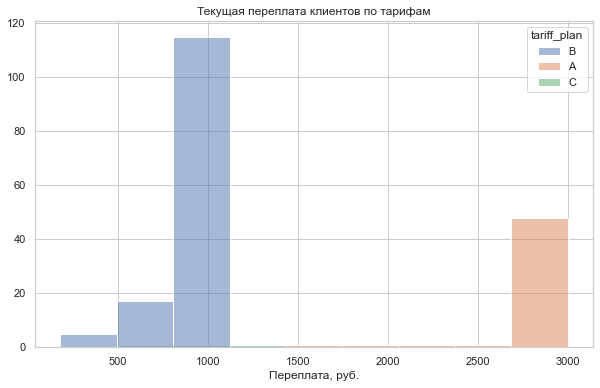

In [86]:
plt.figure(figsize=(10, 6))  
sns.histplot(data=two_tariffs.query('over > 0'), x="over", hue='tariff_plan')
plt.xlabel('–ü–µ—Ä–µ–ø–ª–∞—Ç–∞, —Ä—É–±.')
plt.ylabel(None)
plt.title('–¢–µ–∫—É—â–∞—è –ø–µ—Ä–µ–ø–ª–∞—Ç–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ —Ç–∞—Ä–∏—Ñ–∞–º')
plt.show()

–ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –Ω–µ–≤—ã–≥–æ–¥–Ω—ã–º —Ç–∞—Ä–∏—Ñ–æ–º –ø–µ—Ä–µ–ø–ª–∞—á–∏–≤–∞–ª–∏ –æ–∫–æ–ª–æ 1000 –≤ –º–µ—Å—è—Ü. –ù–∞ —Ç–∞—Ä–∏—Ñ–µ –° —Ç–∞–∫–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –º–∞–ª–æ, –∞ —Å–∞–º–∞—è –±–æ–ª—å—à–∞—è –ø–µ—Ä–µ–ø–ª–∞—Ç–∞ —É –∫–ª–∏–µ–Ω—Ç–æ–≤ —Ç–∞—Ä–∏—Ñ–∞ –ê. –ü–æ —Å—É—Ç–∏, –ø–µ—Ä–µ–ø–ª–∞—Ç–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —Ä–∞–∑–Ω–∏—Ü–µ–π –≤ –∞–±–æ–Ω–µ–Ω—Ç—Å–∫–æ–π –ø–ª–∞—Ç–µ.

### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤—ã—Ä—É—á–∫–∏ —Å —É—á–µ—Ç–æ–º –∏–∑–º–µ–Ω–µ–Ω–∏–π

In [87]:
income_fact.groupby('tariff_plan')['user_id'].nunique()

tariff_plan
A     28
B     90
C    138
Name: user_id, dtype: int64

In [88]:
income_new_tariff.groupby('tariff_plan')['user_id'].nunique()

tariff_plan
A      1
B     46
C    209
Name: user_id, dtype: int64

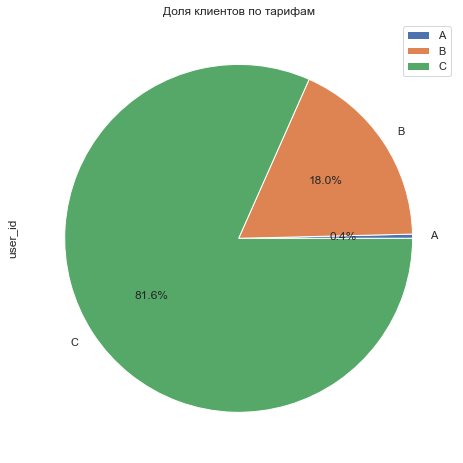

In [89]:
income_new_tariff.groupby('tariff_plan').agg({'user_id': 'nunique'}).plot(
    kind='pie', 
    y='user_id', 
    autopct='%1.1f%%',
    title='–î–æ–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ —Ç–∞—Ä–∏—Ñ–∞–º', 
    figsize=(8, 8))
plt.show()

–ü–æ—Å–ª–µ —Å–º–µ–Ω—ã —Ç–∞—Ä–∏—Ñ–∞ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –¥–ª—è —Ç–µ–∫—É—â–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å–∞–º—ã–º –≤—ã–≥–æ–¥–Ω—è–º —è–≤–ª—è–µ—Ç—Å—è —Ç–∞—Ä–∏—Ñ –°, –∑–Ω–∞—á–∏—Ç —Å—Ä–µ–¥–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ –º–∞–ª–æ —Ç–µ—Ö, –∫—Ç–æ —Ä–∞—Å—Ö–æ–¥—É–µ—Ç –±–æ–ª—å—à–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–∏–Ω—É—Ç

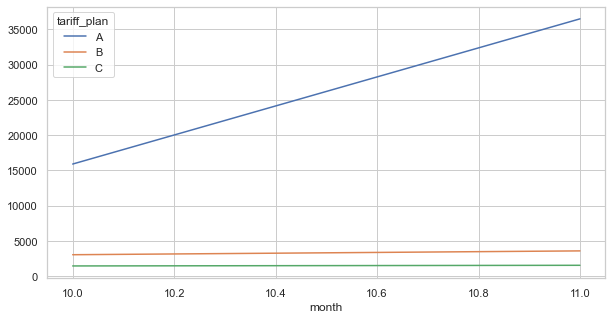

–í—ã—Ä—É—á–∫–∞ –≤—Å–µ–≥–æ: 946827


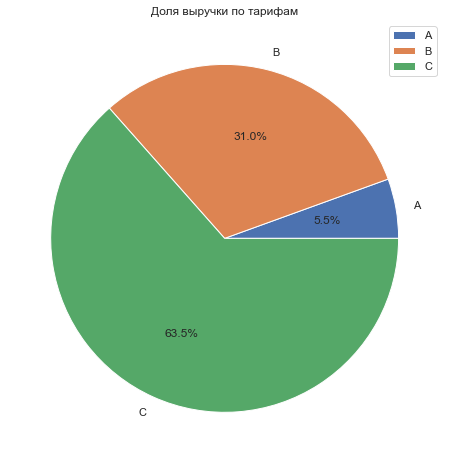

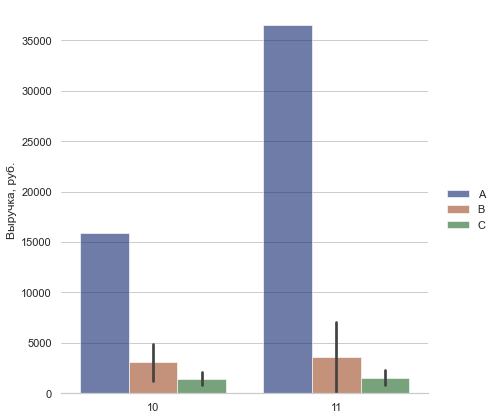

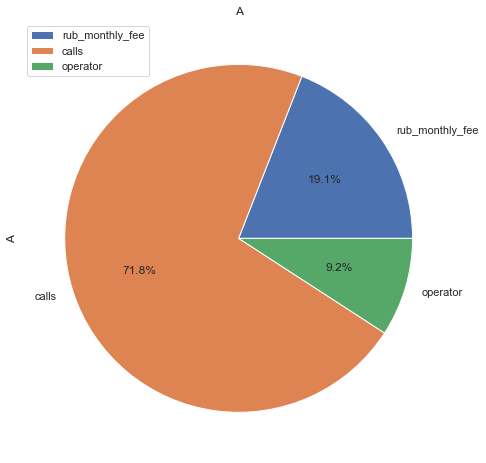

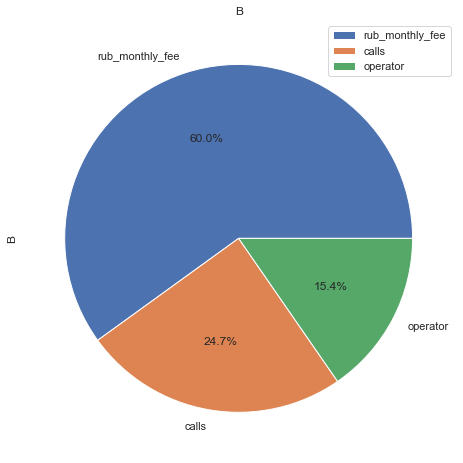

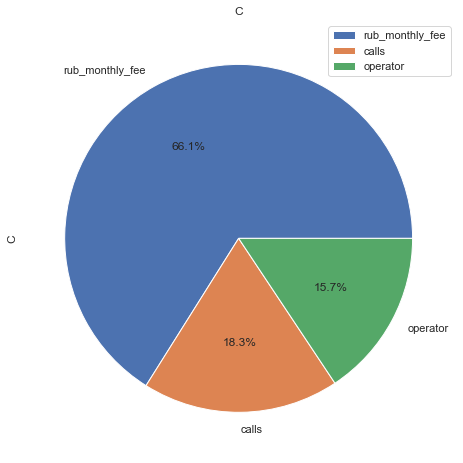

In [90]:
income_vis(income_new_tariff)

–ì—Ä–∞—Ñ–∏–∫ —Å—Ä–µ–¥–Ω–µ–≥–æ —á–µ–∫–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Ç–∞—Ä–∏—Ñ–∞ –ê –≤—ã—Ä–æ—Å –∑–∞ —Å—á–µ—Ç –±–æ–ª—å—à–æ–≥–æ –æ—Ç—Ç–æ–∫–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤, –¥–∞–Ω–Ω—ã–π —Ç–∞—Ä–∏—Ñ –æ—Å—Ç–∞–ª—Å—è –≤—ã–≥–æ–¥–Ω—ã–º —Ç–æ–ª—å–∫–æ –¥–ª—è –æ–¥–Ω–æ–≥–æ –∞–±–æ–Ω–µ–Ω—Ç–∞. –°—Ä–µ–¥–Ω–∏–π —á–µ–∫ –∞–±–æ–Ω–µ–Ω—Ç–æ–≤ —Ç–∞—Ä–∏—Ñ–∞ –í –≤—ã—Ä–æ—Å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ, –∞ —Ç–∞—Ä–∏—Ñ–∞ –° –æ—Å—Ç–∞–ª—Å—è –Ω–∞ –ø—Ä–µ–∂–Ω–µ–º —É—Ä–æ–≤–Ω–µ

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∫–ª–∏–µ–Ω—Ç–æ–≤, –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –Ω–∞ —Ç–∞—Ä–∏—Ñ–µ –ê

In [91]:
income_new_tariff.query('tariff_plan == "A"')

user_id  month tariff_plan  rub_monthly_fee  rub_per_operator  calls  \
456   168361     10           A             5000               100   8614   
457   168361     11           A             5000               100  28998   

     operator  total  
456      2300  15914  
457      2500  36498

–ü–æ—Å–ª–µ –ø–µ—Ä–µ—Ö–æ–¥–∞ –Ω–∞ –±–æ–ª–µ–µ –≤—ã–≥–æ–¥–Ω—ã–µ —Ç–∞—Ä–∏—Ñ—ã, —Ç–∞—Ä–∏—Ñ –ê –æ—Å—Ç–∞–ª—Å—è –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º —Ç–æ–ª—å–∫–æ –¥–ª—è –æ–¥–Ω–æ–≥–æ –∞–±–æ–Ω–µ–Ω—Ç–∞

### –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–æ—Ç–µ—Ä—å

–ü–æ—Å–∏—Ç–∞–µ–º –ø–æ—Ç–µ—Ä–∏ –≤—ã—Ä—É—á–∫–∏ —Å —É—á–µ—Ç–æ–º —Å–º–µ–Ω—ã –∫–ª–∏–µ–Ω—Ç–∞–º–∏ —Ç–∞—Ä–∏—Ñ–∞ –Ω–∞ –±–æ–ª–µ–µ –≤—ã–≥–æ–¥–Ω—ã–π

In [92]:
print('–í—ã—Ä—É—á–∫–∞ —Ñ–∞–∫—Ç:', income_fact['total'].sum())
print('–í—ã—Ä—É—á–∫–∞ –ø–æ—Å–ª–µ —Å–º–µ–Ω—Ç—ã —Ç–∞—Ä–∏—Ñ–∞:', income_new_tariff['total'].sum())
print('–ü–æ—Ç–µ—Ä–∏ –≤—ã—Ä—É—á–∫–∏ –ø–æ—Å–ª–µ —Å–º–µ–Ω—Ç—ã —Ç–∞—Ä–∏—Ñ–∞: {:.1%}'.format(
    (income_fact['total'].sum() - income_new_tariff['total'].sum()) / income_new_tariff['total'].sum()
)
)

–í—ã—Ä—É—á–∫–∞ —Ñ–∞–∫—Ç: 1216802
–í—ã—Ä—É—á–∫–∞ –ø–æ—Å–ª–µ —Å–º–µ–Ω—Ç—ã —Ç–∞—Ä–∏—Ñ–∞: 946827
–ü–æ—Ç–µ—Ä–∏ –≤—ã—Ä—É—á–∫–∏ –ø–æ—Å–ª–µ —Å–º–µ–Ω—Ç—ã —Ç–∞—Ä–∏—Ñ–∞: 28.5%


–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –≤—ã—Ä—É—á–∫—É –∫–ª–∏–µ–Ω—Ç–æ–≤, —Ä–∞–±–æ—Ç–∞—é—â–∏—Ö –∫–∞–∫ —Å –≤—Ö–æ–¥—è—â–∏–º–∏, —Ç–∞–∫ –∏ —Å –∏—Å—Ö–æ–¥—è—â–∏–º–∏ –≤—ã–∑–æ–≤–∞–º–∏

In [93]:
income_fact.query('user_id not in @users_one_direction').groupby(
    ['tariff_plan', 'month']
).agg(
    {'user_id':'nunique', 'operator': 'sum', 'total': 'mean'}
)

user_id  operator        total
tariff_plan month                                
A           10          23     16800  6301.260870
            11          23     21000  8069.173913
B           10          67     22000  2649.880597
            11          74     26200  2741.216216
C           10          87     19100  1720.436782
            11          89     22000  1700.134831

–î–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –≤—ã—Ä—É—á–∫–∏ –∑–∞ —Å—á–µ—Ç –ø–µ—Ä–µ—Ö–æ–¥–∞ —á–∞—Å—Ç–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–∞ –±–æ–ª–µ–µ –≤—ã–≥–æ–¥–Ω—ã–µ —Ç–∞—Ä–∏—Ñ—ã, —Ü–µ–ª–µ—Å–æ–±—Ä–∞–∑–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å –∞–±–æ–Ω–µ–Ω—Ç—Å–∫—É—é –ø–ª–∞—Ç—É —Ç–∞—Ä–∏—Ñ–∞ –° –Ω–∞ 100 —Ä –∏ —Ç–∞—Ä–∏—Ñ–∞ –í –Ω–∞ 300 —Ä.  –¢–∞–∫, –¥–ª—è —Ç–µ–∫—É—â–∏—Ö –∞–±–æ–Ω–µ–Ω—Ç–æ–≤ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –ø–ª–∞—Ç—ã –±—É–¥–µ—Ç –Ω–µ—Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–º, –∞ –∫–ª–∏–µ–Ω—Ç–∞–º, –ø–µ—Ä–µ—à–µ–¥—à–∏–º –Ω–∞ —ç—Ç–∏ —Ç–∞—Ä–∏—Ñ—ã –≤—ã–≥–æ–¥–∞ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—Å—è.

–¢–∞–∫–∂–µ, –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≤—ã—Ä—É—á–∫–∏ —Å –∫–ª–∏–µ–Ω—Ç–æ–≤, —Ä–∞–±–æ—Ç–∞—é—â–∏—Ö —Ç–æ–ª—å–∫–æ –Ω–∞ –≤—Ö–æ–¥—è—â–∏–µ –≤—ã–∑–æ–≤—ã, —Å–ª–µ–¥—É–µ—Ç –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ —Ç–∞–∫–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å —Ç–∞—Ä–∏—Ñ–∞ –° –Ω–∞ —Ç–∞—Ä–∏—Ñ –í –∏ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –∏—Å–∫–ª—é—á–∏—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –¥–ª—è –Ω–æ–≤—ã—Ö –∞–±–æ–Ω–µ–Ω—Ç–æ–≤ —Ç–∞–∫–æ–≥–æ —Ç–∏–ø–∞ –ø–æ–¥–∫–ª—é—á–∞—Ç—å—Å—è –Ω–∞ —Ç–∞—Ä–∏—Ñ –°.

In [94]:
tariffs_new = tariffs
tariffs_new.loc[2, 'rub_monthly_fee'] = 1100
tariffs_new.loc[1, 'rub_monthly_fee'] = 2300
tariffs_new

tariff_plan  rub_monthly_fee  minutes_included  rub_per_min_in  \
0           A             5000              2000            0.10   
1           B             2300              2000            0.15   
2           C             1100              2000            0.30   

   rub_per_min_out  rub_per_operator  
0              0.4               100  
1              0.5               100  
2              0.7               100

In [95]:
# —Å–ø–∏—Å–æ–∫ –∫–ª–∏–µ–Ω—Ç–æ–≤ –¥–ª—è –ø–µ—Ä–µ–≤–æ–¥–∞ –Ω–∞ —Ç–∞—Ä–∏—Ñ –í —Å —Ç–∞—Ä–∏—Ñ–∞ –°

optim_users = clients.query('user_id in @users_one_direction and tariff_plan == "C"')
optim_users = optim_users[['user_id', 'tariff_plan']]
optim_users = optim_users.rename(columns={'tariff_plan': 'offer'})
optim_users['offer'] = "B"

offer_user_list = optim_users.append(change_tariff)
print('–¢–∞—Ä–∏—Ñ –∏–∑–º–µ–Ω–µ–Ω –ø–æ–≤—Ç–æ—Ä–Ω–æ:', len(offer_user_list.groupby('user_id').nunique().query('offer > 1')))

–¢–∞—Ä–∏—Ñ –∏–∑–º–µ–Ω–µ–Ω –ø–æ–≤—Ç–æ—Ä–Ω–æ: 0


In [96]:
# –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –≤—ã—Ä—É—á–∫–∞
optim_income = changed_income(income_copy, optim_users)
optim_income = optim_income.merge(tariffs_new, on='tariff_plan', how='left')

In [97]:
optim_income.groupby('tariff_plan')['user_id'].nunique()

tariff_plan
A      1
B     92
C    163
Name: user_id, dtype: int64

In [98]:
# —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –≤—ã—Ä—É—á–∫—É —Å —É—á–µ—Ç–æ–º —Å–º–µ–Ω—ã —Ç–∞—Ä–∏—Ñ–∞ –∏ –∞–±–æ–Ω–µ–Ω—Ç—Å–∫–æ–π –ø–ª–∞—Ç—ã

income_optimized = income_by_month(optim_income, df)

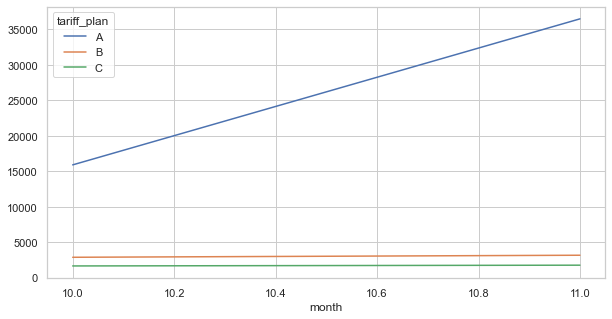

–í—ã—Ä—É—á–∫–∞ –≤—Å–µ–≥–æ: 1117327


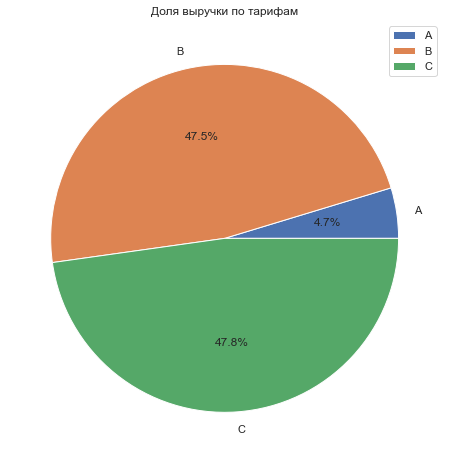

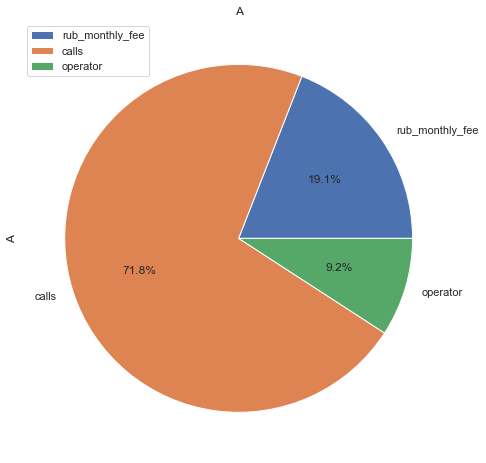

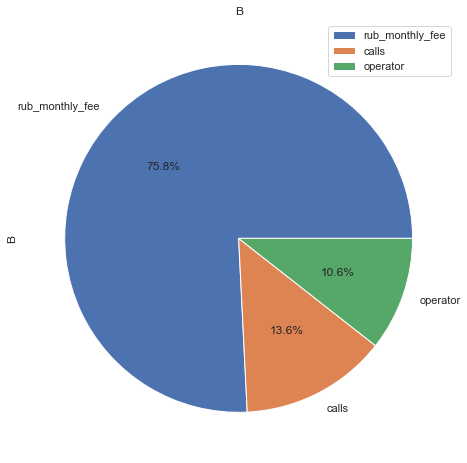

In [99]:
income_vis(income_optimized)

–ü–æ—Å—á–∏—Ç–∞–µ–º –≤—ã—Ä—É—á–∫—É –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏

In [100]:
print('–í—ã—Ä—É—á–∫–∞ —Ñ–∞–∫—Ç:', income_fact['total'].sum())
print('–í—ã—Ä—É—á–∫–∞ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏:', income_optimized['total'].sum())
print('–ü–æ—Ç–µ—Ä–∏ –≤—ã—Ä—É—á–∫–∏ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏: {:.1%}'.format(
    (income_fact['total'].sum() - income_optimized['total'].sum()) / income_optimized['total'].sum()
)
)

–í—ã—Ä—É—á–∫–∞ —Ñ–∞–∫—Ç: 1216802
–í—ã—Ä—É—á–∫–∞ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏: 1117327
–ü–æ—Ç–µ—Ä–∏ –≤—ã—Ä—É—á–∫–∏ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏: 8.9%


###  –í—ã–≤–æ–¥

–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è –≤—ã—Ä—É—á–∫–∞ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 1 216 802 —Ä—É–±. –ö–∞–∂–¥—ã–π —Ç–∞—Ä–∏—Ñ –ø—Ä–∏–Ω–æ—Å–∏—Ç —Ç–µ–ª–µ—Ñ–æ–Ω–∏–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π –¥–æ—Ö–æ–¥, –æ—Å–Ω–æ–≤–Ω–∞—è —á–∞—Å—Ç—å –∫–æ—Ç–æ—Ä–æ–≥–æ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ –∞–±–æ–Ω–µ—Ç—Å–∫—É—é –ø–ª–∞—Ç—É, –∞ –ø–ª–∞—Ç–∞ –∑–∞ –∏—Å—Ö–æ–¥—è—â–∏–µ –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ –≤—ã–∑–æ–≤—ã —Å–æ—Å—Ç–∞–≤–∏–ª–∞ 0 —Ä—É–±. –ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –±–æ–ª—å—à–µ –ø–µ—Ä–µ–ø–ª–∞—á–∏–≤–∞—é—Ç –∫–ª–∏–µ–Ω—Ç—ã —Ç–∞—Ä–∏—Ñ–∞ –ê, –Ω–æ —Ä–µ–∂–µ, —á–µ–º –∫–ª–∏–µ–Ω—Ç—ã —Ç–∞—Ä–∏—Ñ–∞ –í, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö —Å—É–º–º–∞ –ø–µ—Ä–µ–ø–ª–∞—Ç—ã —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–∫–æ–ª–æ 1000 —Ä—É–±. –¢–∞—Ä–∏—Ñ –° –æ—Å—Ç–∞–µ—Ç—Å—è –≤—ã–≥–æ–¥–Ω—ã–º –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –¥–ª—è –≤—Å–µ—Ö –¥–µ–π—Å—Ç–≤—É—é—â–∏—Ö –∞–±–æ–Ω–µ–Ω—Ç–æ–≤. –í —Å–ª—É—á–∞–µ –ø–µ—Ä–µ—Ö–æ–¥–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–∞ –±–æ–ª–µ–µ –≤—ã–≥–æ–¥–Ω—ã–µ —Ç–∞—Ä–∏—Ñ—ã –≤—ã—Ä—É—á–∫–∞ —Å–Ω–∏–∑–∏—Ç—Å—è –Ω–∞ 28,5%, –∞ —Ç–∞—Ä–∏—Ñ –ê –æ—Å—Ç–∞–Ω–µ—Ç—Å—è –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º —Ç–æ–ª—å–∫–æ –¥–ª—è –æ–¥–Ω–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞. –ü–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–º —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –∞–±–æ–Ω–µ–Ω—Ç—Å–∫–æ–π –ø–ª–∞—Ç—ã, –≤—ã—Ä—É—á–∫–∞ —Å–æ—Å—Ç–∞–≤–∏–ª–∞ 1 117 327 —Ä—É–±., —á—Ç–æ –ø–æ–∑–≤–æ–ª–∏–ª–æ —Å–Ω–∏–∑–∏—Ç—å –ø–æ—Ç–µ—Ä–∏ –¥–æ 8,9%

## –ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑

- —Å—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–∞ –¥–æ –∏ –ø–æ—Å–ª–µ –ø–µ—Ä–µ—Ö–æ–¥–∞ –Ω–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Ç–∞—Ä–∏—Ñ –æ–¥–∏–Ω–∞–∫–æ–≤—ã
- —Å—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–∞ –¥–æ –∏ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å —Ä–∞–≤–Ω—ã

–ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—É, —á—Ç–æ —Å—Ä–µ–¥–Ω—è—è –≤—ã—Ä—É—á–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –¥–æ –∏ –ø–æ—Å–ª–µ –ø–µ—Ä–µ—Ö–æ–¥–∞ –Ω–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Ç–∞—Ä–∏—Ñ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è.
–ù0-–°—Ä–µ–¥–Ω—è—è –≤—ã—Ä—É—á–∫–∞ —Ç–∞—Ä–∏—Ñ–æ–≤ —Ä–∞–≤–Ω–∞
–ù1-–°—Ä–µ–¥–Ω—è—è –≤—ã—Ä—É—á–∫–∞ —Ç–∞—Ä–∏—Ñ–æ–≤ —Ä–∞–∑–ª–∏—á–∞–µ—Ç—Å—è

In [101]:
user_list = change_tariff['user_id']

In [102]:
before = income_fact.query('user_id in @user_list')
after = income_optimized.query('user_id in @user_list')



alpha = 0.05  # –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–π —É—Ä–æ–≤–µ–Ω—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏
    # –µ—Å–ª–∏ p-value –æ–∫–∞–∂–µ—Ç—Å—è –º–µ–Ω—å—à–µ –Ω–µ–≥–æ - –æ—Ç–≤–µ—Ä–≥–Ω–µ–º –≥–∏–ø–æ—Ç–µ–∑—É

results = st.ttest_ind(after['total'], before['total'])

print('p-–∑–Ω–∞—á–µ–Ω–∏–µ:', results.pvalue)

print(after['total'].describe(), before['total'].describe())


if results.pvalue < alpha:
    print('–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')
    print('C—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–∞ –¥–æ –∏ –ø–æ—Å–ª–µ –ø–µ—Ä–µ—Ö–æ–¥–∞ –Ω–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Ç–∞—Ä–∏—Ñ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è')
    print()
else:
    print('–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')
    print('C—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–∞ –¥–æ –∏ –ø–æ—Å–ª–µ –ø–µ—Ä–µ—Ö–æ–¥–∞ –Ω–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Ç–∞—Ä–∏—Ñ —Ä–∞–≤–Ω—ã')
    print()

p-–∑–Ω–∞—á–µ–Ω–∏–µ: 1.2325647184852421e-08
count      193.000000
mean      2392.424870
std       2100.187679
min       1100.000000
25%       1400.000000
50%       1813.000000
75%       2658.000000
max      21836.000000
Name: total, dtype: float64 count      193.000000
mean      3633.227979
std       2087.367109
min       2000.000000
25%       2254.000000
50%       2604.000000
75%       5101.000000
max      14434.000000
Name: total, dtype: float64
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É
C—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–∞ –¥–æ –∏ –ø–æ—Å–ª–µ –ø–µ—Ä–µ—Ö–æ–¥–∞ –Ω–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Ç–∞—Ä–∏—Ñ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è



–ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑—ã –ø–æ–∫–∞–∑–∞–ª–∞, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤, –ø–µ—Ä–µ—à–µ–¥—à–∏—Ö –Ω–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Ç–∞—Ä–∏—Ñ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è. –ü–æ —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏—è–º –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –∫–ª–∏–µ–Ω—Ç—ã –±—É–¥—É—Ç —Ç—Ä–∞—Ç–∏—Ç—å –º–µ–Ω—å—à–µ –ø—Ä–∏ –ø–µ—Ä–µ—Ö–æ–¥–µ –Ω–∞ —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ–º—ã–π —Ç–∞—Ä–∏—Ñ

–ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—É, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–∞ –¥–æ –∏ –ø–æ—Å–ª–µ –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏–∏ –ø–∞–¥–µ–Ω–∏—è –≤—ã—Ä—É—á–∫–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã
–ù0-–°—Ä–µ–¥–Ω—è—è –≤—ã—Ä—É—á–∫–∞ —Ç–∞—Ä–∏—Ñ–æ–≤ —Ä–∞–≤–Ω–∞
–ù1-–°—Ä–µ–¥–Ω—è—è –≤—ã—Ä—É—á–∫–∞ —Ç–∞—Ä–∏—Ñ–æ–≤ —Ä–∞–∑–ª–∏—á–∞–µ—Ç—Å—è

–ü–µ—Ä–µ–¥ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏–µ–º —Ç–µ—Å—Ç–∞ –∏–∑—É—á–∏–º –¥–µ—Ç–∞–ª—å–Ω–æ –¥–∞–Ω–Ω—ã–µ. –î–ª—è t-—Ç–µ—Å—Ç–∞ –ø–æ–¥—Ö–æ–¥—è—Ç –≤—ã–±–æ—Ä–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –æ–±–ª–∞–¥–∞—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º (–∏–ª–∏ –∏–º–µ—é—Ç –±–æ–ª–µ–µ 30 –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –≤ –∫–∞–∂–¥–æ–π –≤—ã–±–æ—Ä–∫–µ), –ø—Ä–∏ —ç—Ç–æ–º –Ω–∞–º —Ç–∞–∫–∂–µ –≤–∞–∂–Ω–æ —Å—Ä–∞–≤–Ω–∏—Ç—å –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –¥–≤—É—Ö –≤—ã–±–æ—Ä–æ–∫, –æ—Ç —ç—Ç–æ–≥–æ –±—É–¥–µ—Ç –∑–∞–≤–∏—Å–µ—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä `equal_var`. –ü–æ—ç—Ç–æ–º—É, –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ä–∞–≤–Ω–∏–≤–∞–µ–º—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ —Å—Ä–µ–¥–Ω–µ–≥–æ —á–µ–∫–∞, –∫–æ—Ç–æ—Ä—ã–π –±—ã–ª —Ä–∞—Å—á–∏—Ç–∞–Ω –ø–æ –∏–º–µ—é—â–∏–º—Å—è –¥–∞–Ω–Ω—ã–º –∏ –ø–æ –Ω–∞–∏–±–æ–ª–µ–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞:

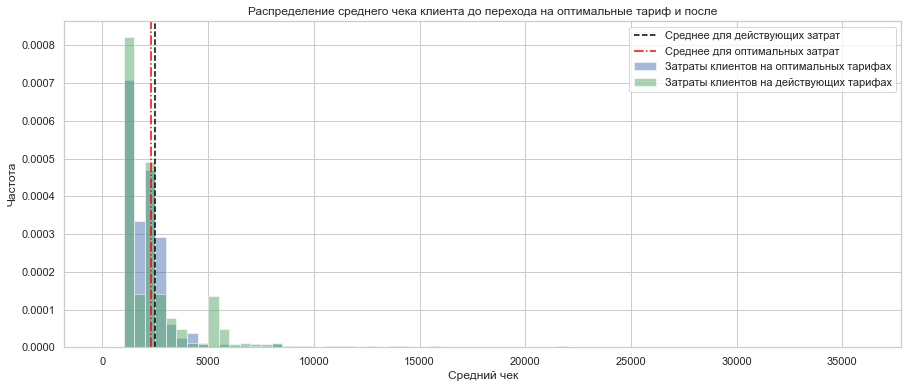

In [103]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –∏ –Ω–∞ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è:
bin_size = 500
fig, ax = plt.subplots(figsize=(15, 6))
bin_max = max(income_optimized['total'].max(), income_fact['total'].max())

ax = (income_optimized['total']
      .hist(bins = np.arange(0, bin_max, bin_size), color='b', label='–ó–∞—Ç—Ä–∞—Ç—ã –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö —Ç–∞—Ä–∏—Ñ–∞—Ö', alpha = 0.5, density=True)
     )
ax = (income_fact['total']
      .hist(bins = np.arange(0, bin_max, bin_size), color='g', label='–ó–∞—Ç—Ä–∞—Ç—ã –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–∞ –¥–µ–π—Å—Ç–≤—É—é—â–∏—Ö —Ç–∞—Ä–∏—Ñ–∞—Ö', alpha = 0.5, density=True)
     )

ax.set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞') 
ax.set_xlabel('–°—Ä–µ–¥–Ω–∏–π —á–µ–∫')

plt.axvline(income_fact['total'].mean(), 
            color = 'black', linestyle="--", label='–°—Ä–µ–¥–Ω–µ–µ –¥–ª—è –¥–µ–π—Å—Ç–≤—É—é—â–∏—Ö –∑–∞—Ç—Ä–∞—Ç')
plt.axvline(income_optimized['total'].mean(), 
            color = 'red', linestyle="-.", label='–°—Ä–µ–¥–Ω–µ–µ –¥–ª—è –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –∑–∞—Ç—Ä–∞—Ç')

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ —á–µ–∫–∞ –∫–ª–∏–µ–Ω—Ç–∞ –¥–æ –ø–µ—Ä–µ—Ö–æ–¥–∞ –Ω–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ —Ç–∞—Ä–∏—Ñ –∏ –ø–æ—Å–ª–µ')
plt.legend()
plt.show()

–ö–∞–∫ –º—ã –≤–∏–¥–∏–º —Å—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–ª–∏–∑–∫–∏, –ø—Ä–∏ —ç—Ç–æ–º –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã - –∞–Ω–æ–º–∞–ª–∏–∏. –î–∞–Ω–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–æ - —Å–∫–æ—à–µ–Ω—ã –≤ –ø—Ä–∞–≤—É—é –æ–±–ª–∞—Å—Ç—å –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã (–≤ –æ–±–ª–∞—Å—Ç—å –≤—ã—Å–æ–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π).

In [104]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É:
display(income_fact['total'].describe())
display(income_optimized['total'].describe())

count      487.000000
mean      2498.566735
std       2457.247376
min       1000.000000
25%       1200.000000
50%       2000.000000
75%       2612.500000
max      36498.000000
Name: total, dtype: float64

count      487.000000
mean      2294.305955
std       2265.385847
min       1100.000000
25%       1334.500000
50%       1917.000000
75%       2452.000000
max      36498.000000
Name: total, dtype: float64

In [105]:
st.levene(income_fact['total'], 
          income_optimized['total'], center='mean')

LeveneResult(statistic=10.786606990378345, pvalue=0.0010588730259319169)

–î–∏—Å–ø–µ—Ä—Å–∏–∏ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è, –∑–Ω–∞—á–∏—Ç –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `equal_var = False`

In [106]:
results = st.ttest_ind(income_fact['total'], income_optimized['total'], equal_var = False)

print('p-–∑–Ω–∞—á–µ–Ω–∏–µ:', results.pvalue)

if results.pvalue < alpha:
    print('–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')
    print('C—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–¥–æ –∏ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è')
    print()
else:
    print('–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')
    print('C—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ –¥–æ –∏ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å —Ä–∞–≤–Ω—ã')
    print()

p-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.1777427764233685
–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É
C—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ –¥–æ –∏ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å —Ä–∞–≤–Ω—ã



–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ U –∫—Ä–∏—Ç–µ—Ä–∏–π Mann-Whitney, —É—á–∏—Ç—ã–≤–∞—è, —á—Ç–æ –≤ –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã:

In [107]:
from scipy.stats import mannwhitneyu
results = mannwhitneyu(income_fact['total'], income_optimized['total'])

print('p-–∑–Ω–∞—á–µ–Ω–∏–µ:', results.pvalue)

if results.pvalue < alpha:
    print('–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')
    print('C—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–¥–æ –∏ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è')
    print()
else:
    print('–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')
    print('C—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ –¥–æ –∏ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å —Ä–∞–≤–Ω—ã')
    print()

p-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.006055001784872843
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É
C—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–¥–æ –∏ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è



–ü–æ–ª—É—á–∞–µ–º —É–∂–µ –¥—Ä—É–≥–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –û—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º –≤—ã–±—Ä–æ—Å—ã –ø–æ 99 –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—é –∏ –ø—Ä–æ–≤–µ—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç t-test.

In [108]:
limit_a = np.percentile(income_fact['total'], 99)
limit_b = np.percentile(income_optimized['total'], 99)

results = st.ttest_ind(income_fact.query('total < @limit_a')['total'], 
                       income_optimized.query('total < @limit_b')['total'], equal_var = False)

print('p-–∑–Ω–∞—á–µ–Ω–∏–µ:', results.pvalue)

if results.pvalue < alpha:
    print('–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')
    print('C—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–∞ –¥–æ –∏ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è')
    print()
else:
    print('–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')
    print('C—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ –¥–æ –∏ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å —Ä–∞–≤–Ω—ã')
    print()

p-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.014005843508519867
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É
C—Ä–µ–¥–Ω–∏–µ —á–µ–∫–∏ –∫–ª–∏–µ–Ω—Ç–∞ –¥–æ –∏ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è



–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑—ã –æ —Ä–∞–∑–ª–∏—á–∏–∏ —Å—Ä–µ–¥–Ω–∏—Ö —á–µ–∫–æ–≤ –¥–æ –∏ –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å, —Ç–µ—Å—Ç –ø–æ–∫–∞–∑–∞–ª —Ä–∞–∑–ª–∏—á–∏—è –≤ —Å—Ä–µ–¥–Ω–µ–º —á–µ–∫–µ. –ü—Ä–æ–≤–µ—Ä–∏–º –∫–∞–∫ –∏–∑–º–µ–Ω–∏–ª—Å—è —á–µ–∫

In [109]:
income_fact['total'].describe()


count      487.000000
mean      2498.566735
std       2457.247376
min       1000.000000
25%       1200.000000
50%       2000.000000
75%       2612.500000
max      36498.000000
Name: total, dtype: float64

In [110]:
income_optimized['total'].describe()

count      487.000000
mean      2294.305955
std       2265.385847
min       1100.000000
25%       1334.500000
50%       1917.000000
75%       2452.000000
max      36498.000000
Name: total, dtype: float64

–ü–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å —Å—Ä–µ–¥–Ω–∏–π —á–µ–∫ –∫–ª–∏–µ–Ω—Ç–∞ —É–º–µ–Ω—å—à–∏–ª—Å—è

## –í—ã–≤–æ–¥

–ü—Ä–æ–≤–µ–¥–µ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ "–ù—É–ø–æ–∑–≤–æ–Ω–∏" –ø—Ä–∏–≤–ª–µ–∫–∞—é—Ç –¥–æ 5 –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤. –ò–∑ –∞–∫—Ç–∏–≤–Ω—ã—Ö 256 –∫–ª–∏–µ–Ω—Ç–æ–≤ 54% –ø–æ–¥–∫–ª—é—á–µ–Ω—ã –Ω–∞ —Ç–∞—Ä–∏—Ñ –°, –∞ –Ω–∞ —Ç–∞—Ä–∏—Ñ –ê —Ç–æ–ª—å–∫–æ 11%. 63 —Ä–∞–±–æ—Ç–∞—é—Ç —Ç–æ–ª—å–∫–æ –Ω–∞ –≤—Ö–æ–¥—è—â–∏–µ –≤—ã–∑–æ–≤—ã. –°—Ä–µ–¥–Ω—è—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤—ã–∑–æ–≤–æ–≤, —Å–æ–≤–µ—Ä—à–µ–Ω–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º–∏ –∑–∞ –¥–µ–Ω—å –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∞—Ä–∏—Ñ–∞. –î–ª—è —Ç–∞—Ä–∏—Ñ–æ–≤ –ê –∏ –í —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã –±–æ–ª–µ–µ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω—ã–µ –≤—ã–∑–æ–≤—ã, –∞ –¥–ª—è —Ç–∞—Ä–∏—Ñ–∞ –ê –∫–æ—Ä–æ—Ç–∫–∏–µ –∑–≤–æ–Ω–∫–∏ –∏ –æ—Ç 1 –¥–æ 3 –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤.
–ù–µ —Å–º–æ—Ç—Ä—è –Ω–∞ —Ä–∞–∑–Ω–∏—Ü—É –≤ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —É—Å–ª—É–≥, –≤—Å–µ —Ç—Ä–∏ —Ç–∞—Ä–∏—Ñ–∞ –ø—Ä–∏–Ω–æ—Å—è—Ç –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π –¥–æ—Ö–æ–¥. –ß–∞—â–µ –ø–µ—Ä–µ–ø–ª–∞—á–∏–≤–∞—é—Ç –∫–ª–∏–µ–Ω—Ç—ã —Ç–∞—Ä–∏—Ñ–∞ –í –≤ —Å—É–º–º–µ –æ–∫–æ–ª–æ 1000 —Ä—É–±. –≤ –º–µ—Å—è—Ü. –ö–ª–∏–µ–Ω—Ç—ã —Ç–∞—Ä–∏—Ñ–∞ –ê –ø–µ—Ä–µ–ø–ª–∞—á–∏–≤–∞—é—Ç —Ä–µ–∂–µ, –Ω–æ —Å—É–º–º–∞ –ø–µ—Ä–µ–ø–ª–∞—Ç—ã –¥–æ—Å—Ç–∏–≥–∞–µ—Ç 3000 —Ä—É–±. –¢–∞—Ä–∏—Ñ –° –æ—Å—Ç–∞–µ—Ç—Å—è –≤—ã–≥–æ–¥–Ω—ã–º –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –¥–ª—è –≤—Å–µ—Ö –¥–µ–π—Å—Ç–≤—É—é—â–∏—Ö –∞–±–æ–Ω–µ–Ω—Ç–æ–≤. –í —Å–ª—É—á–∞–µ –ø–µ—Ä–µ—Ö–æ–¥–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–∞ –±–æ–ª–µ–µ –≤—ã–≥–æ–¥–Ω—ã–µ —Ç–∞—Ä–∏—Ñ—ã –≤—ã—Ä—É—á–∫–∞ —Å–Ω–∏–∑–∏—Ç—Å—è –Ω–∞ 28,5%, –∞ —Ç–∞—Ä–∏—Ñ –ê –æ—Å—Ç–∞–Ω–µ—Ç—Å—è –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º —Ç–æ–ª—å–∫–æ –¥–ª—è –æ–¥–Ω–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞. –ü–µ—Ä–µ–≤–æ–¥ –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–∞ –±–æ–ª–µ–µ –≤—ã–≥–æ–¥–Ω—ã–π —Ç–∞—Ä–∏—Ñ –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–Ω–∏–∑–∏—Ç—å —Å—Ä–µ–¥–Ω–∏–π —á–µ–∫ –∫–ª–∏–µ–Ω—Ç–æ–≤, –∞ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–æ—Ç–µ—Ä—å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–º —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –∞–±–æ–Ω–µ–Ω—Ç—Å–∫–æ–π –ø–ª–∞—Ç—ã –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–Ω–∏–∑–∏—Ç—å –ø–æ—Ç–µ—Ä–∏ –¥–æ 8,9%.